In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

amazon_india_2015_2025 = pd.read_csv("D:/Code/Project/Amazon/data/amazon_india_cleaned_data.csv")
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'])


<Figure size 1000x500 with 0 Axes>

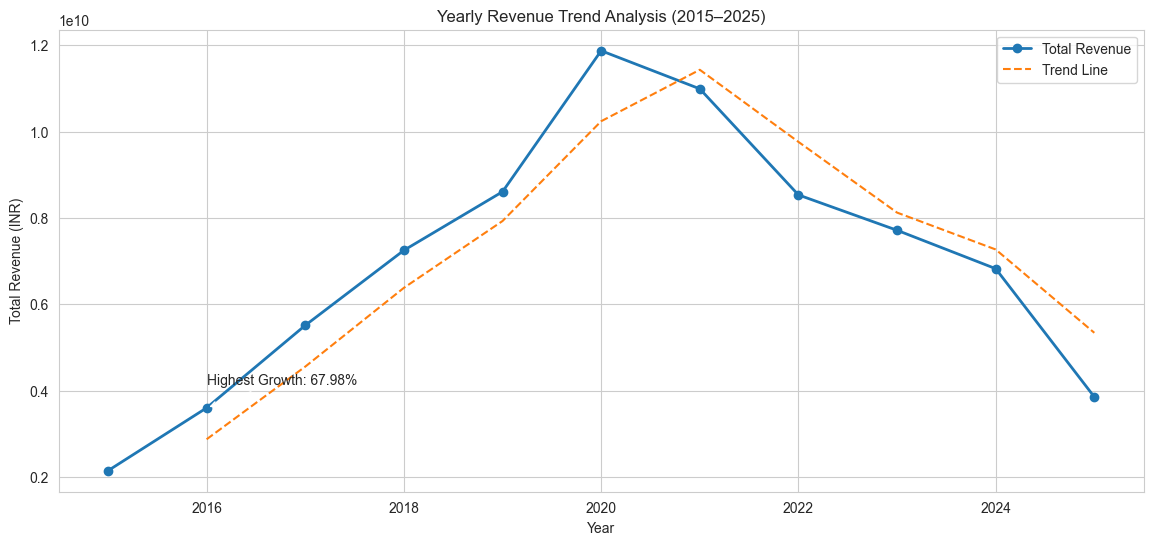

order_year  final_amount_inr  yoy_growth_pct         trend
0         2015      2.142163e+09             NaN           NaN
1         2016      3.598316e+09           67.98  2.870240e+09
2         2017      5.510026e+09           53.13  4.554171e+09
3         2018      7.248545e+09           31.55  6.379285e+09
4         2019      8.605901e+09           18.73  7.927223e+09
5         2020      1.187319e+10           37.97  1.023955e+10
6         2021      1.099021e+10           -7.44  1.143170e+10
7         2022      8.532312e+09          -22.36  9.761261e+09
8         2023      7.712999e+09           -9.60  8.122656e+09
9         2024      6.823413e+09          -11.53  7.268206e+09
10        2025      3.851650e+09          -43.55  5.337532e+09

In [7]:
# 1️⃣ Aggregate yearly revenue
yearly_revenue = (
    amazon_india_2015_2025
    .groupby('order_year')['final_amount_inr']
    .sum()
    .reset_index()
    .sort_values('order_year')
)

# 2️⃣ Calculate YoY growth %
yearly_revenue['yoy_growth_pct'] = (
    yearly_revenue['final_amount_inr']
    .pct_change() * 100
).round(2)

# 3️⃣ Trend line (rolling mean)
yearly_revenue['trend'] = (
    yearly_revenue['final_amount_inr']
    .rolling(window=2)
    .mean()
)

# 4️⃣ Identify highest growth year
max_growth = yearly_revenue.loc[
    yearly_revenue['yoy_growth_pct'].idxmax()
]

# 5️⃣ Plot
plt.figure(figsize=(14,6))

plt.plot(
    yearly_revenue['order_year'],
    yearly_revenue['final_amount_inr'],
    marker='o',
    linewidth=2,
    label='Total Revenue'
)

plt.plot(
    yearly_revenue['order_year'],
    yearly_revenue['trend'],
    linestyle='--',
    label='Trend Line'
)

# Annotation
plt.annotate(
    f"Highest Growth: {max_growth['yoy_growth_pct']}%",
    xy=(max_growth['order_year'], max_growth['final_amount_inr']),
    xytext=(max_growth['order_year'], max_growth['final_amount_inr'] * 1.15),
    arrowprops=dict(arrowstyle='->')
)

plt.title('Yearly Revenue Trend Analysis (2015–2025)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (INR)')
plt.legend()
plt.grid(True)

plt.show()

# 6️⃣ Final table output
yearly_revenue

2.Seasonal Sales Trend Analysis Using Monthly Heatmaps

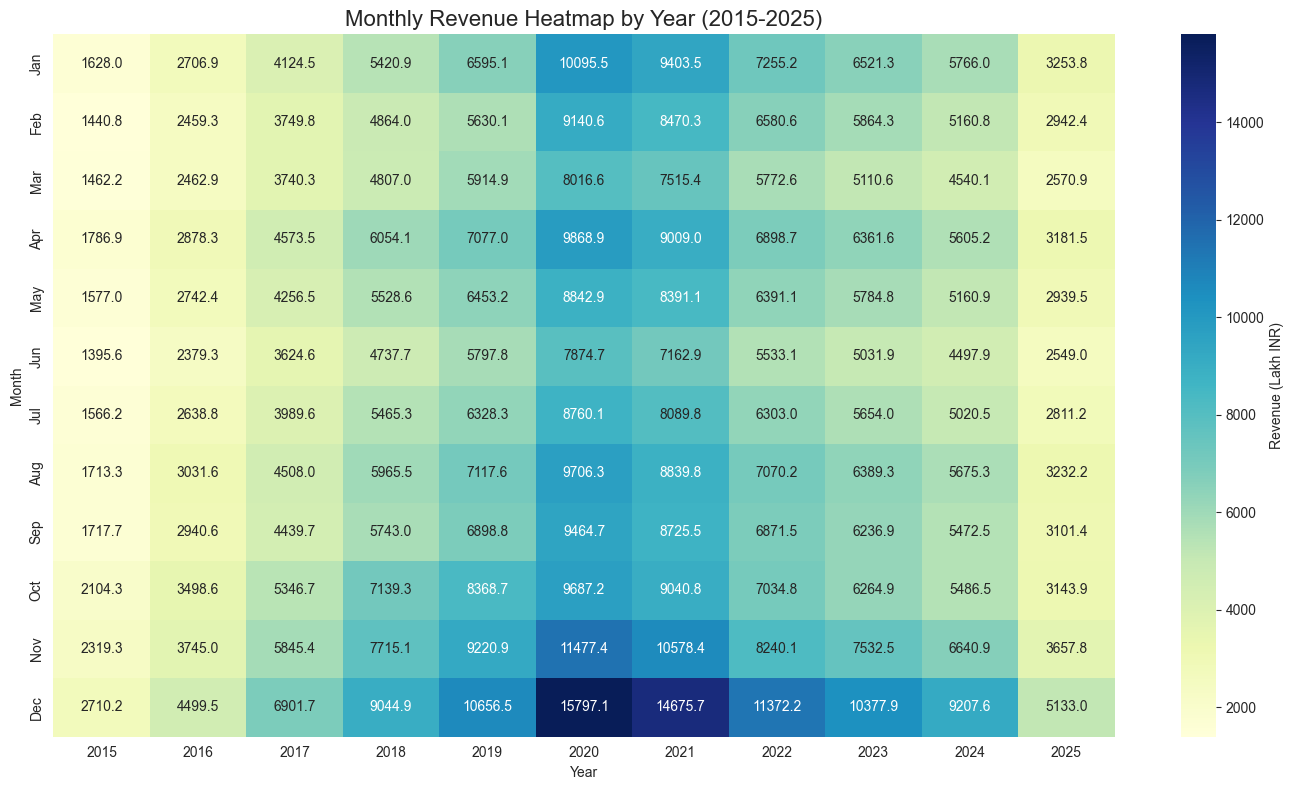

C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\864030924.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_total, x='month_name', y='final_amount_lakh', palette='viridis')


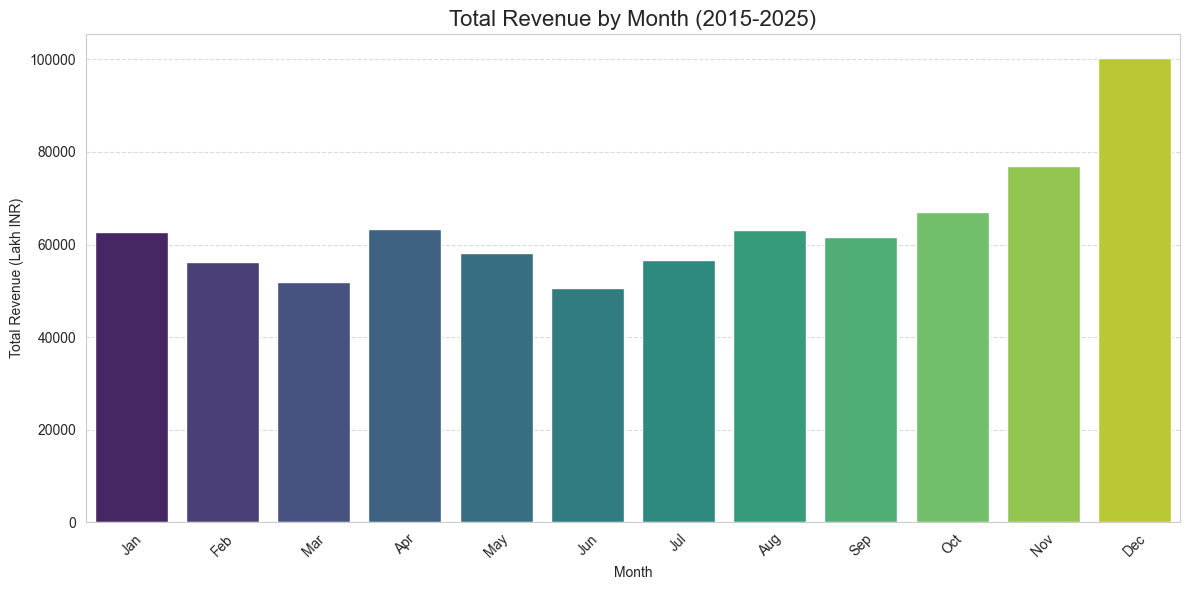

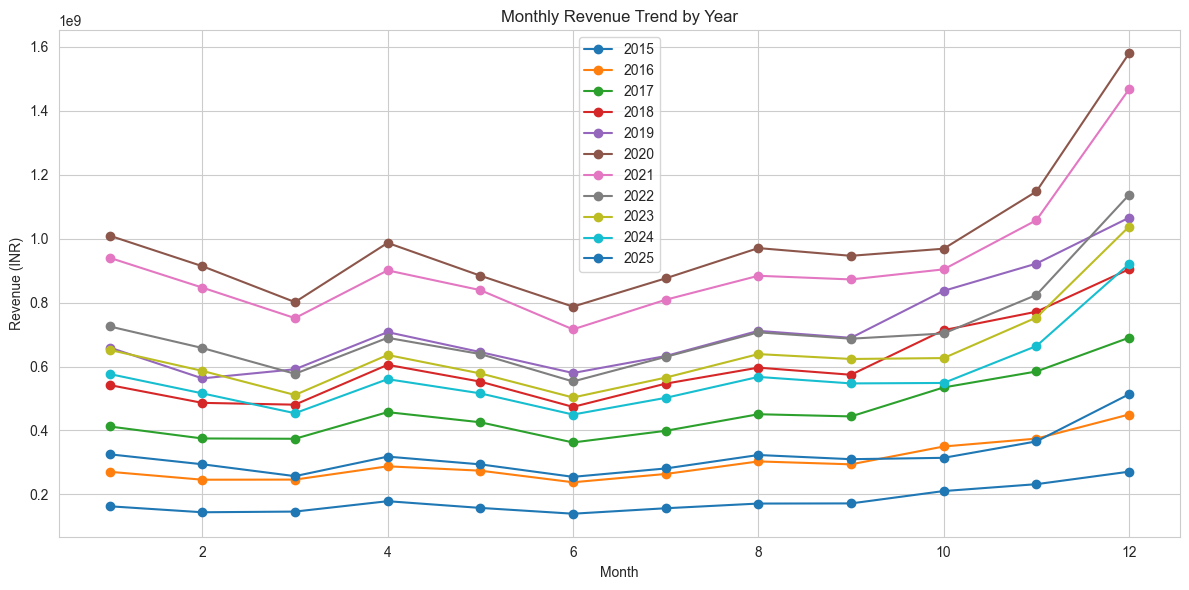


  PEAK MONTH BY CATEGORY:
  electronic: Jan (₹1,709,351)
  electronics: Dec (₹10,032,271,795)
  electronics & accessories: Dec (₹2,332,034)
  electronicss: Jun (₹2,258,645)


In [5]:
# --- STEP 1: Month Names ---
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# --- STEP 2: Prepare Data ---
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')
amazon_india_2015_2025['year'] = amazon_india_2015_2025['order_date'].dt.year
amazon_india_2015_2025['month'] = amazon_india_2015_2025['order_date'].dt.month

# Convert revenue to lakhs for clean visualization
amazon_india_2015_2025['final_amount_lakh'] = amazon_india_2015_2025['final_amount_inr'] / 1_00_000

# --- STEP 3: Monthly Revenue Heatmap by Year ---
monthly_sales_pivot = amazon_india_2015_2025.pivot_table(
    index='month',
    columns='year',
    values='final_amount_lakh',
    aggfunc='sum'
)
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_sales_pivot, cmap='YlGnBu', annot=True, fmt=".1f", 
            yticklabels=month_names, cbar_kws={'label':'Revenue (Lakh INR)'})
plt.title("Monthly Revenue Heatmap by Year (2015-2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

# --- STEP 4: Total Revenue by Month Across All Years ---
monthly_total = amazon_india_2015_2025.groupby('month')['final_amount_lakh'].sum().reset_index()
monthly_total['month_name'] = monthly_total['month'].map(lambda x: month_names[x-1])

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_total, x='month_name', y='final_amount_lakh', palette='viridis')
plt.title('Total Revenue by Month (2015-2025)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue (Lakh INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- STEP 5: Monthly Revenue Trend per Year ---
plt.figure(figsize=(12, 6))
for year in sorted(amazon_india_2015_2025['year'].unique()):
    monthly = amazon_india_2015_2025[amazon_india_2015_2025['year'] == year].groupby('month')['final_amount_inr'].sum()
    plt.plot(monthly.index, monthly.values, marker='o', label=str(year))
plt.title('Monthly Revenue Trend by Year')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.legend()
plt.tight_layout()
plt.show()

# --- STEP 6: Peak Month for Each Category ---
category_peaks = amazon_india_2015_2025.groupby(['category', 'month'])['final_amount_inr'].sum().reset_index()
idx = category_peaks.groupby('category')['final_amount_inr'].idxmax()
peak_per_category = category_peaks.loc[idx]

print("\n  PEAK MONTH BY CATEGORY:")
for _, row in peak_per_category.iterrows():
    month_name = month_names[row['month']-1]  # month_names list starts at 0
    print(f"  {row['category']}: {month_name} (₹{row['final_amount_inr']:,.0f})")

3.Customer Segmentation Using RFM (Recency, Frequency, Monetary) Analysis

d:\Code\Project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


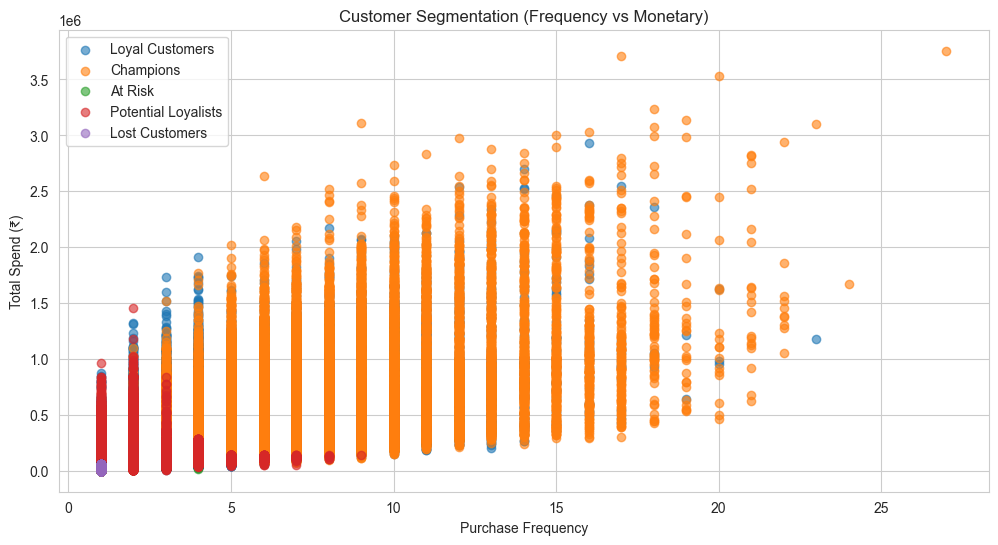

customers  avg_recency  avg_frequency   avg_monetary
segment                                                                  
Potential Loyalists     100827  1354.865671       2.045256  113811.717564
Loyal Customers          98587  1384.852110       3.754491  272109.609590
Champions                78328   770.346709       5.807923  436721.383036
At Risk                  62224  1797.781451       1.306923   62448.300608
Lost Customers           15003  2532.536626       1.000000   32904.744938

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1️⃣ Reference Date (latest order)
# ===============================
snapshot_date = amazon_india_2015_2025['order_date'].max() + pd.Timedelta(days=1)

# ===============================
# 2️⃣ Build RFM Table
# ===============================
rfm = (
    amazon_india_2015_2025
    .groupby('customer_id')
    .agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,   # Recency
        'transaction_id': 'count',                                # Frequency
        'final_amount_inr': 'sum'                                 # Monetary
    })
    .reset_index()
)

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# ===============================
# 3️⃣ RFM Scoring (BULLETPROOF)
# ===============================

# Recency (lower is better → reverse labels)
rfm['R_score'] = pd.qcut(
    rfm['recency'].rank(method='first'),
    4,
    labels=[4,3,2,1]
)

# Frequency (higher is better)
rfm['F_score'] = pd.qcut(
    rfm['frequency'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)

# Monetary (higher is better)
rfm['M_score'] = pd.qcut(
    rfm['monetary'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)

rfm[['R_score','F_score','M_score']] = (
    rfm[['R_score','F_score','M_score']]
    .astype(int)
)

rfm['RFM_score'] = (
    rfm['R_score'] +
    rfm['F_score'] +
    rfm['M_score']
)


# ===============================
# 4️⃣ Customer Segments
# ===============================
def segment_customer(score):
    if score >= 10:
        return 'Champions'
    elif score >= 8:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalists'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['segment'] = rfm['RFM_score'].apply(segment_customer)

# ===============================
# 5️⃣ Scatter Plot: Frequency vs Monetary
# ===============================
plt.figure(figsize=(12,6))

for seg in rfm['segment'].unique():
    temp = rfm[rfm['segment'] == seg]
    plt.scatter(
        temp['frequency'],
        temp['monetary'],
        alpha=0.6,
        label=seg
    )

plt.title('Customer Segmentation (Frequency vs Monetary)')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend (₹)')
plt.legend()
plt.grid(True)

plt.show()

# ===============================
# 6️⃣ Segment Summary Table
# ===============================
segment_summary = (
    rfm
    .groupby('segment')
    .agg(
        customers=('customer_id', 'count'),
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean')
    )
    .sort_values('customers', ascending=False)
)

segment_summary


4.Evolution of Payment Methods and Market Share Trends (2015–2025)

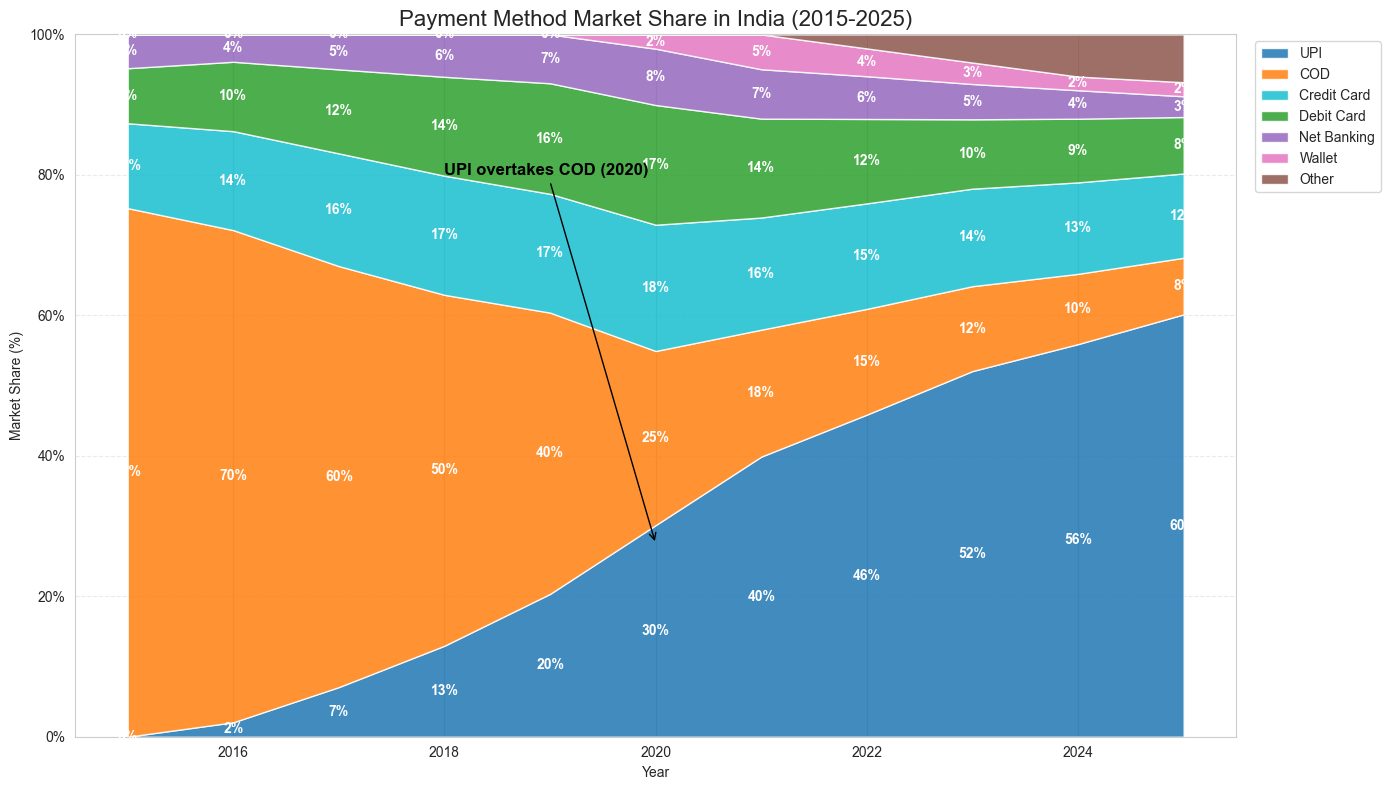


Top payment methods by total transactions (2015-2025):
payment_method
UPI            384228.0
COD            322831.0
Credit Card    172261.0
Debit Card     140202.0
Net Banking     64971.0
Wallet          22821.0
Other           20295.0
dtype: float64

Sample: Year-wise UPI & COD % (if present):


payment_method    UPI    COD
order_year                  
2015             0.00  75.27
2016             2.06  70.08
2017             7.07  59.94
2018            12.96  49.96
2019            20.34  40.04
2020            30.13  24.79
2021            39.89  18.07
2022            45.87  15.06
2023            52.07  12.09
2024            55.91  10.00
2025            60.14   8.06

payment_method  Year    UPI    COD  Credit Card  Debit Card  Net Banking  \
0               2015   0.00  75.27        12.09        7.84         4.81   
1               2016   2.06  70.08        14.09        9.88         3.89   
2               2017   7.07  59.94        16.05       11.96         4.98   
3               2018  12.96  49.96        16.96       14.08         6.04   
4               2019  20.34  40.04        16.92       15.75         6.95   
5               2020  30.13  24.79        17.97       17.05         8.02   
6               2021  39.89  18.07        15.96       14.09         7.03   
7               2022  45.87  15.06        15.02       12.02         6.08   
8               2023  52.07  12.09        13.89        9.88         5.02   
9               2024  55.91  10.00        13.02        9.07         4.05   
10              2025  60.14   8.06        12.00        8.04         2.95   

payment_method  Wallet  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 2.03  
6                 4.96  
7                 3.96  
8                 3.06  
9                 1.95  
10                2.00

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ---------------------------
# 1) Filter years 2015-2025
# ---------------------------
df = amazon_india_2015_2025.copy()
df = df[(df['order_year'] >= 2015) & (df['order_year'] <= 2025)]

# ---------------------------
# 2) Aggregate transaction counts by year x payment method
# ---------------------------
count_tbl = (
    df.groupby(['order_year','payment_method'])['transaction_id']
    .count().rename('tx_count').reset_index()
)
pivot_count = count_tbl.pivot(index='order_year', columns='payment_method', values='tx_count').fillna(0)

# ---------------------------
# 3) Consolidate minor methods into "Other"
# ---------------------------
def consolidate_methods(pivot_df, main_methods=['UPI','COD','Credit Card','Debit Card','Net Banking','Wallet'], top_n=7):
    # Include all main methods explicitly
    top = [m for m in main_methods if m in pivot_df.columns]
    others = [c for c in pivot_df.columns if c not in top]
    df_top = pivot_df[top].copy()
    if others:
        df_top['Other'] = pivot_df[others].sum(axis=1)
    return df_top

pc = consolidate_methods(pivot_count)

# Ensure consistent column order
cols_order = ['UPI','COD','Credit Card','Debit Card','Net Banking','Wallet','Other']
pc = pc[[c for c in cols_order if c in pc.columns]]

# ---------------------------
# 4) Convert to % market share
# ---------------------------
pc_share = pc.div(pc.sum(axis=1), axis=0) * 100
years = pc_share.index.values

# ---------------------------
# 5) Identify UPI > COD crossover year
# ---------------------------
if 'UPI' in pc_share.columns and 'COD' in pc_share.columns:
    crossover_year = (pc_share['UPI'] > pc_share['COD']).idxmax()
else:
    crossover_year = None

# ---------------------------
# 6) Plot stacked area chart
# ---------------------------
fig, ax = plt.subplots(figsize=(14,8))

labels = pc_share.columns.tolist()
yvals = [pc_share[c].values for c in labels]

colors = {
    'UPI':'#1f77b4',        # Blue
    'COD':'#ff7f0e',        # Orange
    'Credit Card':'#17becf',# Teal
    'Debit Card':'#2ca02c', # Green
    'Net Banking':'#9467bd',# Purple
    'Wallet':'#e377c2',     # Pink
    'Other':'#8c564b'       # Brown
}

ax.stackplot(years, yvals, labels=labels, colors=[colors.get(c,'gray') for c in labels], alpha=0.85)

# ---------------------------
# 7) Add inline % labels for key methods
# ---------------------------
for year in years:
    cumulative = 0
    for method in labels:
        value = pc_share.loc[year, method]
        cumulative += value
        if method in ['UPI','COD','Credit Card','Debit Card','Net Banking','Wallet']:
            ax.text(year, cumulative - value/2,
                    f"{value:.0f}%", ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# ---------------------------
# 8) Annotate UPI > COD crossover
# ---------------------------
if crossover_year:
    upi_value = pc_share.loc[crossover_year, 'UPI']
    cod_value = pc_share.loc[crossover_year, 'COD']
    ax.annotate(f"UPI overtakes COD ({crossover_year})",
                xy=(crossover_year, (upi_value+cod_value)/2),
                xytext=(crossover_year-2, 80),
                arrowprops=dict(arrowstyle='->', color='black'),
                fontsize=12, fontweight='bold', color='black')

# ---------------------------
# 9) Labels, grid, legend
# ---------------------------
ax.set_title('Payment Method Market Share in India (2015-2025)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Market Share (%)')
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_ylim(0,100)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(loc='upper left', bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

# ---------------------------
# 6) Show summary tables for interpretation
# ---------------------------
print("\nTop payment methods by total transactions (2015-2025):")
print(pc.sum().sort_values(ascending=False).head(10))

print("\nSample: Year-wise UPI & COD % (if present):")
cols_to_show = [c for c in ['UPI','COD'] if c in pc_share.columns]
display(pc_share[cols_to_show].round(2))
# ---------------------------
# 10) Print summary of major methods
# ---------------------------
# List of key methods
key_methods = ['UPI','COD','Credit Card','Debit Card','Net Banking','Wallet']

# Keep only methods present in the data
methods_present = [m for m in key_methods if m in pc_share.columns]

# Create a single table
summary_table = pc_share[methods_present].round(2)

# Reset index so 'Year' is a column
summary_table = summary_table.reset_index().rename(columns={'order_year':'Year'})

# Display the table
display(summary_table)



5.Category-Wise Performance Analysis: Revenue Contribution, Growth Rates, and Market Share

subcategory  final_amount_cr  market_share_pct
3         Smartphones      5615.210090              73.0
1             Laptops       940.403239              12.2
4             Tablets       508.289259               6.6
2         Smart Watch       321.505872               4.2
5  Tv & Entertainment       192.341776               2.5
0               Audio       111.122720               1.4

C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\1816912526.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_rev, x='subcategory', y=subcat_rev['final_amount_inr']/1e7, palette='viridis')


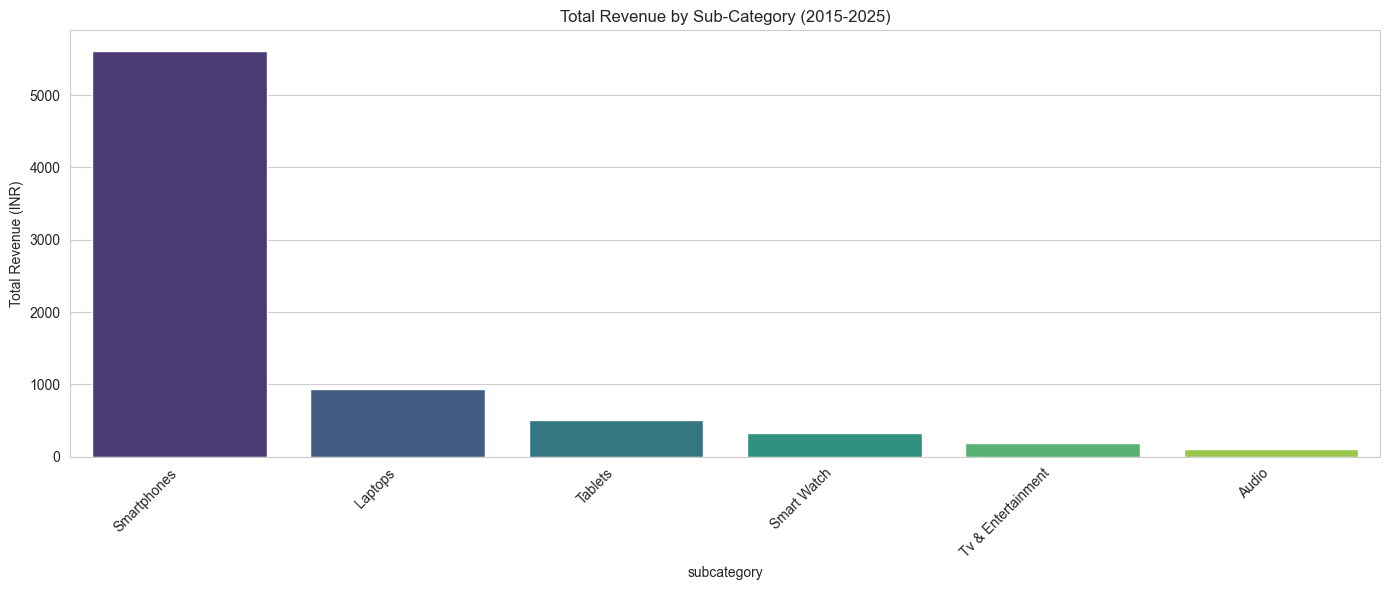

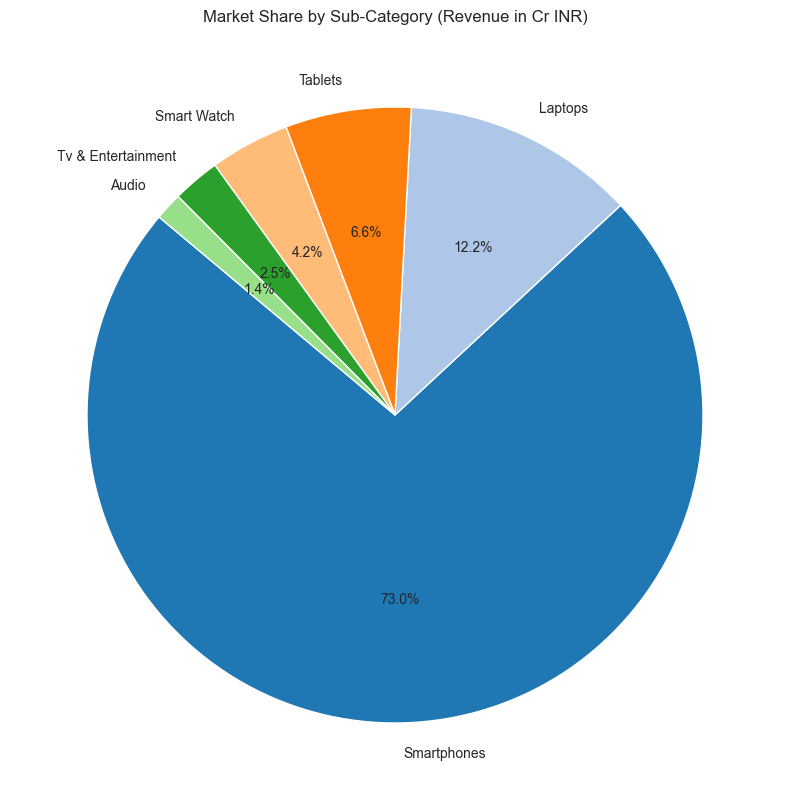

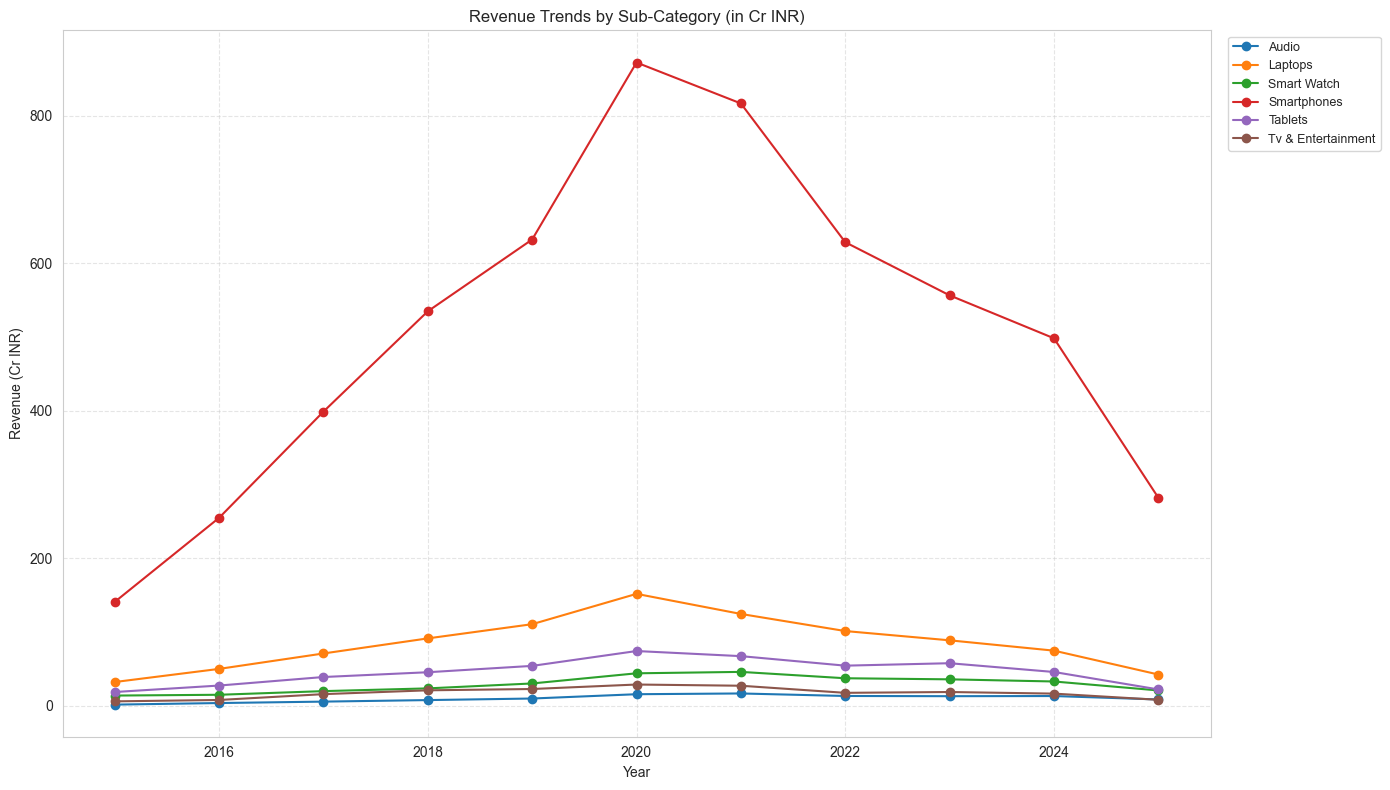

subcategory  final_amount_inr  final_amount_cr  market_share_pct  \
0         Smartphones       5615.210090      5615.210090              73.0   
1             Laptops        940.403239       940.403239              12.2   
2             Tablets        508.289259       508.289259               6.6   
3         Smart Watch        321.505872       321.505872               4.2   
4  Tv & Entertainment        192.341776       192.341776               2.5   
5               Audio        111.122720       111.122720               1.4   

   avg_yoy_growth_pct  
0                13.3  
1                 7.6  
2                 6.7  
3                 6.9  
4                 9.9  
5                24.1

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Clean sub-category column
# ---------------------------
df = amazon_india_2015_2025.copy()
df['subcategory'] = df['subcategory'].str.strip().str.title()

# ---------------------------
# 2️⃣ Aggregate total revenue by sub-category
# ---------------------------
subcat_rev = (
    df.groupby('subcategory', as_index=False)['final_amount_inr']
    .sum()
    .sort_values('final_amount_inr', ascending=False)
)

# Convert revenue to crores
subcat_rev['final_amount_cr'] = subcat_rev['final_amount_inr'] / 1e7

# Add % market share column (rounded to 1 decimal)
subcat_rev['market_share_pct'] = (subcat_rev['final_amount_cr'] / subcat_rev['final_amount_cr'].sum() * 100).round(1)

# Keep only relevant columns for display
subcat_rev_display = subcat_rev[['subcategory', 'final_amount_cr', 'market_share_pct']]

display(subcat_rev_display)


# ---------------------------
# 3️⃣ Calculate YoY growth per sub-category
# ---------------------------
subcat_yearly = (
    df.groupby(['subcategory','order_year'], as_index=False)['final_amount_inr']
    .sum()
)

subcat_yearly['yoy_growth_pct'] = subcat_yearly.groupby('subcategory')['final_amount_inr'].pct_change()*100

# ---------------------------
# 4️⃣ Bar chart: Total Revenue by Sub-Category
# ---------------------------
plt.figure(figsize=(14,6))
sns.barplot(data=subcat_rev, x='subcategory', y=subcat_rev['final_amount_inr']/1e7, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue (INR)")
plt.title("Total Revenue by Sub-Category (2015-2025)")
plt.tight_layout()
plt.show()

# ---------------------------
# 5️⃣ Pie chart: Market Share by Sub-Category
# ---------------------------
plt.figure(figsize=(10,10))
colors = sns.color_palette('tab20', len(subcat_rev))

# Convert revenue to crores for display
revenues_cr = subcat_rev['final_amount_inr'] / 1e7

plt.pie(
    revenues_cr, 
    labels=subcat_rev['subcategory'], 
    autopct=lambda p: f'{p:.1f}%',  # still show percentage
    startangle=140,
    colors=colors
)
plt.title("Market Share by Sub-Category (Revenue in Cr INR)")
plt.show()


# ---------------------------
# 6️⃣ Line chart: Revenue Trends by Sub-Category
# ---------------------------
plt.figure(figsize=(14,8))
for subcat in subcat_yearly['subcategory'].unique():
    temp = subcat_yearly[subcat_yearly['subcategory']==subcat]
    plt.plot(temp['order_year'], temp['final_amount_inr']/1e7, marker='o', label=subcat)

plt.title("Revenue Trends by Sub-Category (in Cr INR)")
plt.xlabel("Year")
plt.ylabel("Revenue (Cr INR)")
plt.legend(loc='upper left', bbox_to_anchor=(1.01,1), fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------
# 7️⃣ Summary table: Revenue, Market Share, Avg YoY Growth
# ---------------------------
summary_table = subcat_rev.copy()
avg_growth = subcat_yearly.groupby('subcategory')['yoy_growth_pct'].mean().reset_index()
summary_table = summary_table.merge(avg_growth, on='subcategory')
summary_table = summary_table.rename(columns={'yoy_growth_pct':'avg_yoy_growth_pct'})
summary_table['final_amount_inr'] = summary_table['final_amount_inr']/1e7
summary_table['market_share_pct'] = summary_table['market_share_pct'].round(1)
summary_table['avg_yoy_growth_pct'] = summary_table['avg_yoy_growth_pct'].round(1)

display(summary_table)


6.Impact of Prime Membership on Customer Behavior and Spending Patterns


Average Order Value (₹ Thousands):


is_prime_member  avg_order_value_thousands
0            False                       62.0
1             True                       78.2

C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\2819301890.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\2819301890.py:37: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
d:\Code\Project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


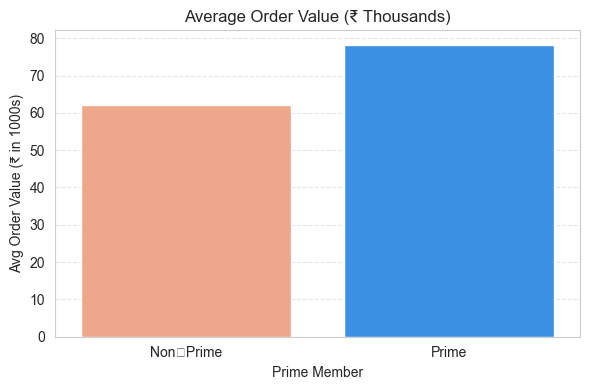


Order Frequency (Count in Thousands):


is_prime_member  order_count_thousands
0            False                  698.5
1             True                  429.1

C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\2819301890.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\2819301890.py:70: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
d:\Code\Project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


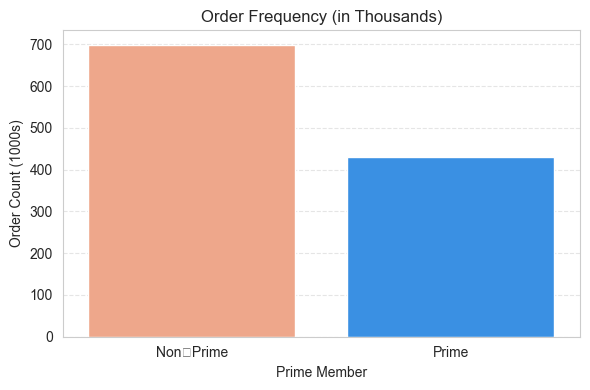


Sub‑Category Revenue Contribution (Cr INR):


Non-Prime    Prime  Total (Cr)
subcategory                                       
Smartphones           3164.29  2450.92     5615.21
Laptops                500.27   440.13      940.40
Tablets                296.04   212.25      508.29
Smart Watch            200.02   121.48      321.51
TV & Entertainment      97.75    94.59      192.34
Audio                   74.62    36.50      111.12

C:\Users\Dell\AppData\Local\Temp\ipykernel_44412\2819301890.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subcat_table.index, rotation=45, ha='right')


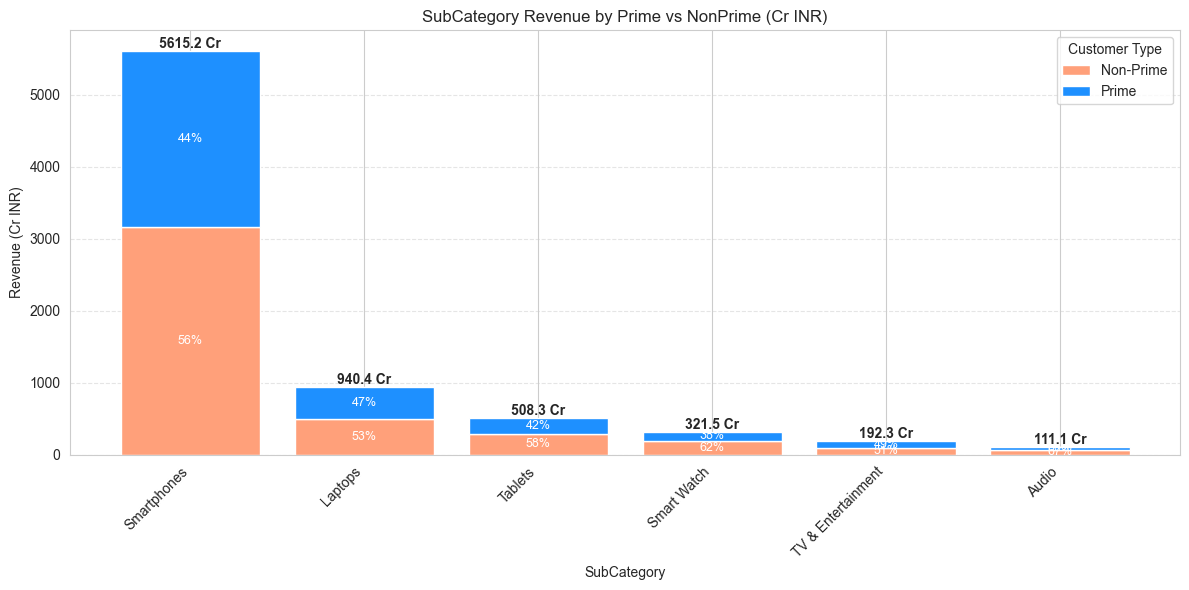

Prime vs Non-Prime Revenue by Sub-Category (Cr INR):


Non-Prime        Prime   Total (Cr)  Non-Prime %  \
subcategory                                                              
Smartphones         3164.286574  2450.923516  5615.210090         56.4   
Laptops              500.270382   440.132858   940.403239         53.2   
Tablets              296.042608   212.246651   508.289259         58.2   
Smart Watch          200.022885   121.482987   321.505872         62.2   
TV & Entertainment    97.751026    94.590749   192.341776         50.8   
Audio                 74.618525    36.504195   111.122720         67.1   

                    Prime %  
subcategory                  
Smartphones            43.6  
Laptops                46.8  
Tablets                41.8  
Smart Watch            37.8  
TV & Entertainment     49.2  
Audio                  32.9

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Wedge

# --------------------------------------
# 1) AVERAGE ORDER VALUE (AOV)
# --------------------------------------

aov_df = (
    amazon_india_2015_2025
    .groupby('is_prime_member')['final_amount_inr']
    .mean()
    .reset_index(name='avg_order_value_inr')
)

# Convert to INR thousands for readability
aov_df['avg_order_value_thousands'] = (aov_df['avg_order_value_inr'] / 1000).round(1)

print("\nAverage Order Value (₹ Thousands):")
display(aov_df[['is_prime_member','avg_order_value_thousands']])

# AOV Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(
    data=aov_df,
    x='is_prime_member',
    y='avg_order_value_thousands',
    palette=['#FFA07A','#1E90FF']
)
plt.title('Average Order Value (₹ Thousands)')
plt.xlabel('Prime Member')
plt.ylabel('Avg Order Value (₹ in 1000s)')
plt.xticks([0,1], ['Non‑Prime','Prime'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------
# 2) ORDER FREQUENCY
# --------------------------------------

freq_df = (
    amazon_india_2015_2025
    .groupby('is_prime_member')['transaction_id']
    .count()
    .reset_index(name='order_count')
)

# Convert to thousands for readability
freq_df['order_count_thousands'] = (freq_df['order_count'] / 1000).round(1)

print("\nOrder Frequency (Count in Thousands):")
display(freq_df[['is_prime_member','order_count_thousands']])

# Order Frequency Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(
    data=freq_df,
    x='is_prime_member',
    y='order_count_thousands',
    palette=['#FFA07A','#1E90FF']
)
plt.title('Order Frequency (in Thousands)')
plt.xlabel('Prime Member')
plt.ylabel('Order Count (1000s)')
plt.xticks([0,1], ['Non‑Prime','Prime'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------
# 3) SUBCATEGORY PREFERENCES
# --------------------------------------

subcat_pref = (
    amazon_india_2015_2025
    .groupby(['is_prime_member','subcategory'])['final_amount_inr']
    .sum()
    .reset_index(name='total_revenue_inr')
)

# Convert to crores
subcat_pref['total_revenue_cr'] = subcat_pref['total_revenue_inr'] / 1e7

# Table: Prime vs Non‑Prime Subcategory revenue
subcat_table = subcat_pref.pivot(
    index='subcategory',
    columns='is_prime_member',
    values='total_revenue_cr'
).fillna(0)

subcat_table.columns = ['Non-Prime','Prime']
subcat_table['Total (Cr)'] = subcat_table['Non-Prime'] + subcat_table['Prime']
subcat_table = subcat_table.sort_values('Total (Cr)', ascending=False).round(2)

print("\nSub‑Category Revenue Contribution (Cr INR):")
display(subcat_table)

# Stacked Bar Chart: Subcategory Preferences
fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(subcat_table))
colors = ['#FFA07A','#1E90FF']  # Non‑Prime / Prime

for i,col in enumerate(['Non-Prime','Prime']):
    ax.bar(subcat_table.index, subcat_table[col], bottom=bottom, label=col, color=colors[i])
    # add % labels
    for j,val in enumerate(subcat_table[col]):
        if val>0:
            pct = val / subcat_table.iloc[j][['Non-Prime','Prime']].sum() * 100
            ax.text(j, bottom[j]+val/2, f"{pct:.0f}%", ha='center', va='center', color='white', fontsize=9)
    bottom += subcat_table[col].values

# Add total values on top
for j,total in enumerate(subcat_table['Total (Cr)']):
    ax.text(j, total+0.5, f"{total:.1f} Cr", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('SubCategory Revenue by Prime vs NonPrime (Cr INR)')
ax.set_ylabel('Revenue (Cr INR)')
ax.set_xlabel('SubCategory')
ax.set_xticklabels(subcat_table.index, rotation=45, ha='right')
ax.legend(title='Customer Type')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------
# Create summary table for Prime vs Non-Prime revenue
# ---------------------------

# Use subcat_pref from earlier (already has revenue per sub-category & Prime flag)
subcat_table = subcat_pref.pivot(
    index='subcategory',
    columns='is_prime_member',
    values='total_revenue_cr'
).fillna(0)

# Rename columns for clarity
subcat_table.columns = ['Non-Prime', 'Prime']

# Total revenue per sub-category
subcat_table['Total (Cr)'] = subcat_table['Non-Prime'] + subcat_table['Prime']

# % contribution of each group
subcat_table['Non-Prime %'] = (subcat_table['Non-Prime'] / subcat_table['Total (Cr)'] * 100).round(1)
subcat_table['Prime %'] = (subcat_table['Prime'] / subcat_table['Total (Cr)'] * 100).round(1)

# Sort by total revenue
subcat_table = subcat_table.sort_values('Total (Cr)', ascending=False)

# Display table
print("Prime vs Non-Prime Revenue by Sub-Category (Cr INR):")
display(subcat_table)


# ---------------------------
# Aggregate total revenue per sub-category (Prime + Non-Prime)
# ---------------------------
total_subcat = (
    amazon_india_2015_2025
    .groupby('subcategory')['final_amount_inr']
    .sum()
    .reset_index(name='total_revenue_inr')
)

# Convert to crores
total_subcat['total_revenue_cr'] = total_subcat['total_revenue_inr'] / 1e7

# Sort by revenue
total_subcat = total_subcat.sort_values('total_revenue_cr', ascending=False)


7.Geographic analysis of sales performance across Indian cities and states

customer_state  revenue_cr
7      Maharashtra     1755.01
2            Delhi      928.23
11      Tamil Nadu      792.38
4        Karnataka      768.09
3          Gujarat      718.30
13   Uttar Pradesh      679.38
14     West Bengal      505.31
12       Telangana      333.60
10       Rajasthan      264.45
6   Madhya Pradesh      221.41
9           Punjab      218.58
5           Kerala      142.97
0   Andhra Pradesh      126.03
1            Bihar      119.20
8           Odisha      115.93

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\1050086007.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




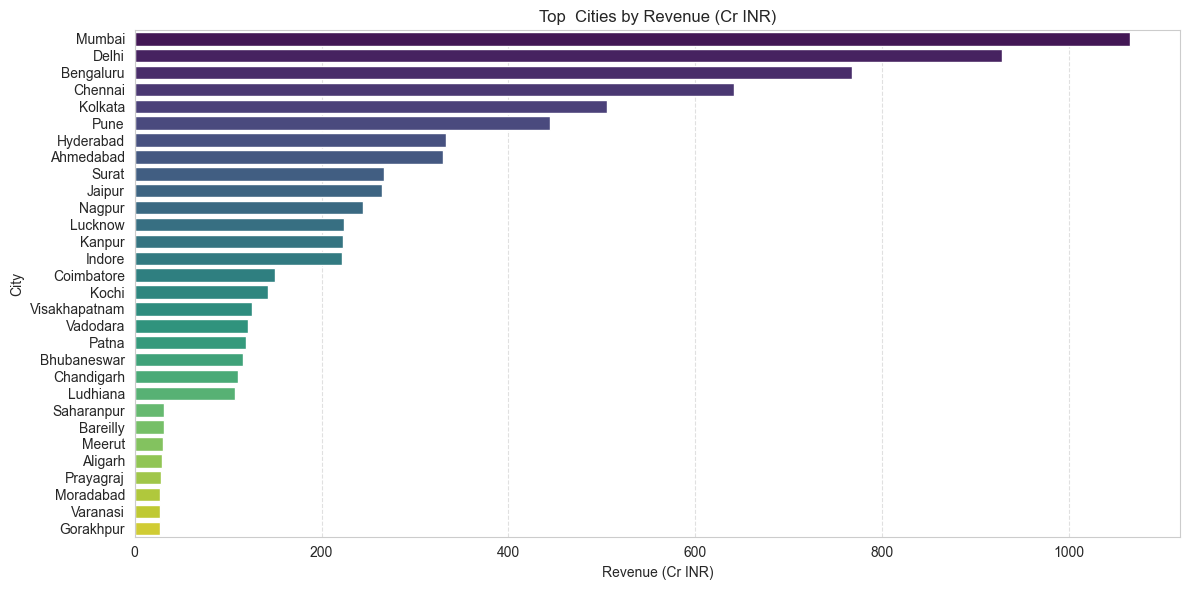

customer_city  revenue_cr
20         Mumbai     1065.63
8           Delhi      928.23
3       Bengaluru      768.09
6         Chennai      641.68
15        Kolkata      505.31
24           Pune      444.56
10      Hyderabad      333.60
0       Ahmedabad      330.05
26          Surat      266.67
12         Jaipur      264.45
21         Nagpur      244.83
16        Lucknow      224.42
13         Kanpur      222.60
11         Indore      221.41
7      Coimbatore      150.70
14          Kochi      142.97
29  Visakhapatnam      126.03
27       Vadodara      121.58
22          Patna      119.20
4     Bhubaneswar      115.93
5      Chandigarh      110.76
17       Ludhiana      107.82
25     Saharanpur       31.37
2        Bareilly       30.96
18         Meerut       30.74
1         Aligarh       29.66
23      Prayagraj       27.67
19      Moradabad       27.64
28       Varanasi       27.36
9       Gorakhpur       26.96

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\1050086007.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




customer_tier  revenue_cr
0         Metro     4242.54
2         Tier1     2218.99
3         Tier2      994.99
1         Rural      232.36

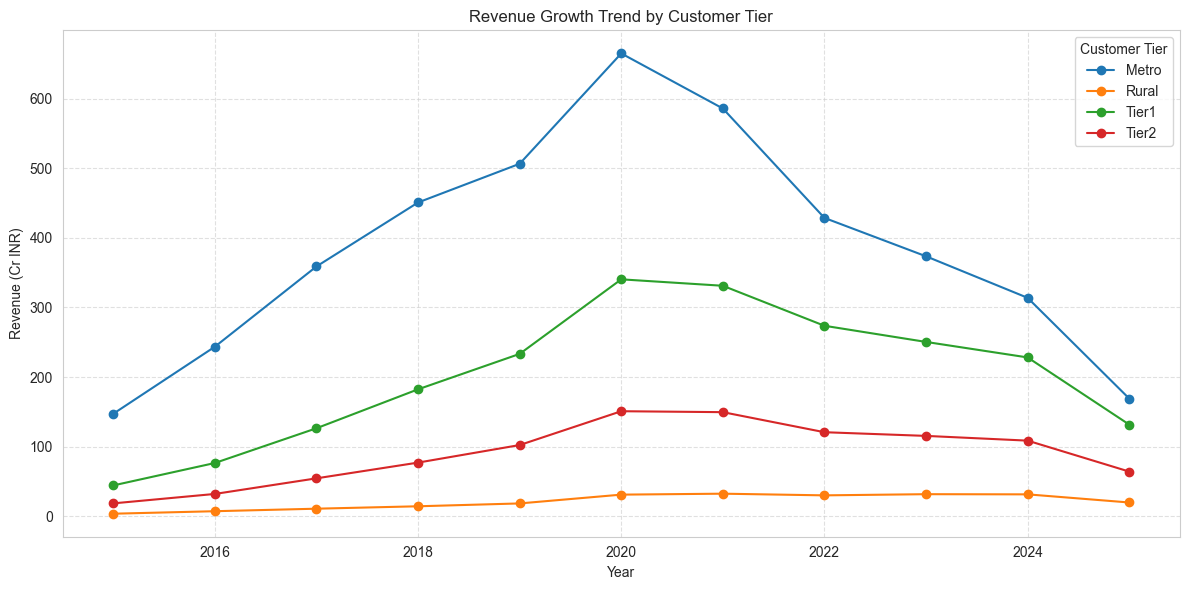

In [3]:
# ============================================================
# GEOGRAPHIC SALES PERFORMANCE ANALYSIS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ---------------------------
# 1️⃣ Data Preparation
# ---------------------------
df = amazon_india_2015_2025.copy()
df['revenue_cr'] = df['final_amount_inr'] / 1e7   # Convert INR → Crores

# ---------------------------
# 2️⃣ State-wise Revenue Choropleth (India)
# ---------------------------
state_rev = (
    df.groupby('customer_state', as_index=False)['revenue_cr']
    .sum()
)

fig = px.choropleth(
    state_rev,
    geojson='https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/india_states.geojson',
    featureidkey='properties.ST_NM',
    locations='customer_state',
    color='revenue_cr',
    color_continuous_scale='YlOrRd',
    title='State-wise Revenue Distribution (Cr INR)'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

# 🔹 SHOW TABLE 
state_rev_table = (
    state_rev
    .sort_values('revenue_cr', ascending=False)
    .assign(revenue_cr=lambda x: x['revenue_cr'].round(2))
)

display(state_rev_table)


# ---------------------------
# 3️⃣ Top Cities by Revenue
# ---------------------------
city_rev = (
    df.groupby('customer_city', as_index=False)['revenue_cr']
    .sum()
    .sort_values('revenue_cr', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(data=city_rev, x='revenue_cr', y='customer_city', palette='viridis')
plt.title('Top  Cities by Revenue (Cr INR)')
plt.xlabel('Revenue (Cr INR)')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🔹 SHOW TABLE 
city_rev_table = (
    city_rev
    .sort_values('revenue_cr', ascending=False)
    .assign(revenue_cr=lambda x: x['revenue_cr'].round(2))
)

display(city_rev_table)


# ---------------------------
# 4️⃣ Revenue Contribution by Customer Tier
# ---------------------------
tier_rev = (
    df.groupby('customer_tier', as_index=False)['revenue_cr']
    .sum()
    .sort_values('revenue_cr', ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(data=tier_rev, x='customer_tier', y='revenue_cr', palette='coolwarm')
plt.title('Revenue by Customer Tier (Cr INR)')
plt.xlabel('Customer Tier')
plt.ylabel('Revenue (Cr INR)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🔹 SHOW TABLE 
tier_rev_table = tier_rev.copy()
tier_rev_table['revenue_cr'] = tier_rev_table['revenue_cr'].round(2)

display(tier_rev_table)


# ---------------------------
# 5️⃣ Growth Pattern by Tier (YoY)
# ---------------------------
tier_yearly = (
    df.groupby(['customer_tier','order_year'], as_index=False)['revenue_cr']
    .sum()
)

tier_yearly['yoy_growth_pct'] = (
    tier_yearly
    .groupby('customer_tier')['revenue_cr']
    .pct_change() * 100
)

plt.figure(figsize=(12,6))
for tier in tier_yearly['customer_tier'].unique():
    temp = tier_yearly[tier_yearly['customer_tier'] == tier]
    plt.plot(temp['order_year'], temp['revenue_cr'], marker='o', label=tier)

plt.title('Revenue Growth Trend by Customer Tier')
plt.xlabel('Year')
plt.ylabel('Revenue (Cr INR)')
plt.legend(title='Customer Tier')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





8.Festival sales impact

sale_type   Festival  Normal  Total (Cr)
order_year                              
2015           48.17  166.04      214.21
2016           79.90  279.93      359.83
2017          122.06  428.95      551.01
2018          161.29  563.57      724.86
2019          192.66  667.93      860.59
2020          250.05  937.27     1187.32
2021          235.59  863.43     1099.02
2022          182.39  670.84      853.23
2023          163.17  608.13      771.30
2024          145.36  536.98      682.34
2025           81.21  303.96      385.17

festival_name  Amazon Great Indian Festival  Back to School  Diwali Sale  \
order_year                                                                 
2015                                   7.57           11.17        12.46   
2016                                  13.09           19.30        19.78   
2017                                  18.97           29.17        31.36   
2018                                  24.83           38.99        41.92   
2019                                  29.65           46.14        48.37   
2020                                  37.10           61.97        58.09   
2021                                  35.55           57.87        52.92   
2022                                  27.91           44.79        41.89   
2023                                  23.96           41.15        37.31   
2024                                  21.34           36.45        33.03   
2025                                  12.03           20.27        18.70   

festival_name  Holi Festival  Prime Day  Republic Day Sale  Summer Sale  \
order_year                                                                
2015                    5.36       1.26               2.55         6.12   
2016                    8.65       2.14               4.41         9.59   
2017                   13.53       2.98               6.42        15.28   
2018                   17.30       3.99               8.33        19.99   
2019                   21.89       5.07              10.29        24.22   
2020                   28.59       6.46              14.80        32.51   
2021                   27.37       6.56              14.61        30.49   
2022                   21.20       5.06              10.63        23.54   
2023                   19.02       4.41               9.79        20.75   
2024                   16.16       3.67               9.38        19.12   
2025                    9.62       2.01               4.82        10.32   

festival_name  Valentine Sale  Total (Cr)  
order_year                                 
2015                     1.68       48.17  
2016                     2.95       79.91  
2017                     4.36      122.07  
2018                     5.93      161.28  
2019                     7.04      192.67  
2020                    10.53      250.05  
2021                    10.23      235.60  
2022                     7.37      182.39  
2023                     6.80      163.19  
2024                     6.21      145.36  
2025                     3.43       81.20

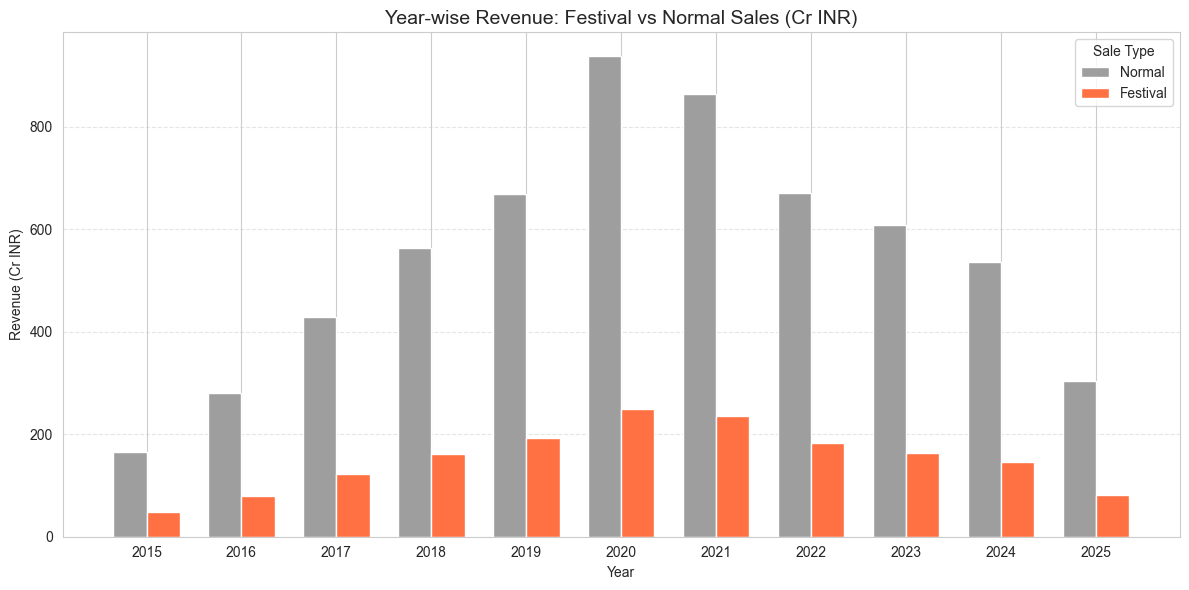

period                        Before  During  After
festival_name                                      
Amazon Great Indian Festival       0  251.99      0
Back to School                     0  407.26      0
Diwali Sale                        0  395.82      0
Holi Festival                      0  188.68      0
Prime Day                          0   43.61      0
Republic Day Sale                  0   96.02      0
Summer Sale                        0  211.92      0
Valentine Sale                     0   66.53      0

period                        Before  During  After  \
festival_name                                         
Amazon Great Indian Festival       0  251.99      0   
Back to School                     0  407.26      0   
Diwali Sale                        0  395.82      0   
Holi Festival                      0  188.68      0   
Prime Day                          0   43.61      0   
Republic Day Sale                  0   96.02      0   
Summer Sale                        0  211.92      0   
Valentine Sale                     0   66.53      0   

period                        Uplift % (During vs Before)  
festival_name                                              
Amazon Great Indian Festival                          0.0  
Back to School                                        0.0  
Diwali Sale                                           0.0  
Holi Festival                                         0.0  
Prime Day                                             0.0  
Republic Day Sale                                     0.0  
Summer Sale                                           0.0  
Valentine Sale                                        0.0

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\1067054850.py:251: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



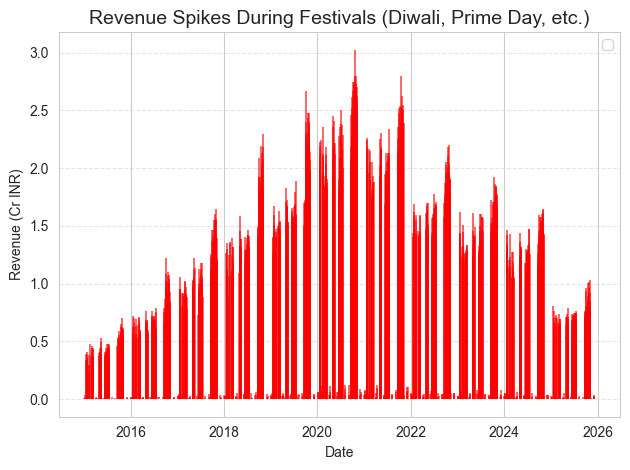

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Prepare data
# ---------------------------
df = amazon_india_2015_2025.copy()
df['order_date'] = pd.to_datetime(df['order_date'])

# Ensure year column
df['order_year'] = df['order_date'].dt.year

# Revenue in Crores
df['revenue_cr'] = df['final_amount_inr'] / 1e7

# Replace non-festival names 
df['festival_name'] = df['festival_name'].fillna('Normal Day')

# Label Festival vs Normal
df['sale_type'] = df['is_festival_sale'].map({True: 'Festival', False: 'Normal'})

# ---------------------------
# Yearly aggregation
# ---------------------------
yearly_sales = (
    df.groupby(['order_year', 'sale_type'])['revenue_cr']
      .sum()
      .reset_index()
)

# Pivot to table format
yearly_sales_table = (
    yearly_sales
    .pivot(index='order_year', columns='sale_type', values='revenue_cr')
    .fillna(0)
    .round(2)
)

# Add total column
yearly_sales_table['Total (Cr)'] = (
    yearly_sales_table.get('Festival', 0) +
    yearly_sales_table.get('Normal', 0)
)

display(yearly_sales_table)

# ---------------------------
# Year + Festival aggregation
# ---------------------------
festival_df = df[df['is_festival_sale'] == True].copy()

year_festival_sales = (
    festival_df
    .groupby(['order_year', 'festival_name'])['revenue_cr']
    .sum()
    .reset_index()
)

# Pivot for clean table
year_festival_table = (
    year_festival_sales
    .pivot(index='order_year', columns='festival_name', values='revenue_cr')
    .fillna(0)
    .round(2)
)

# Add yearly total
year_festival_table['Total (Cr)'] = year_festival_table.sum(axis=1).round(2)

display(year_festival_table)
# ---------------------------
# Stacked bar plot: Festival vs Normal (Year-wise)
# ---------------------------

fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(yearly_sales_table.index))
width = 0.35

ax.bar(
    x - width/2,
    yearly_sales_table['Normal'],
    width,
    label='Normal',
    color='#9E9E9E'
)

ax.bar(
    x + width/2,
    yearly_sales_table['Festival'],
    width,
    label='Festival',
    color='#FF7043'
)

ax.set_title('Year-wise Revenue: Festival vs Normal Sales (Cr INR)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (Cr INR)')
ax.set_xticks(x)
ax.set_xticklabels(yearly_sales_table.index)
ax.legend(title='Sale Type')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# ---------------------------
#  Identify festival date ranges
# ---------------------------
# ---------------------------
# Festival date ranges (min/max only)
# ---------------------------
festival_ranges = (
    df[df['is_festival_sale']]
    .groupby(['order_year', 'festival_name'])['order_date']
    .agg(min_date='min', max_date='max')
    .reset_index()
)

# ---------------------------
# Merge ranges back to df (NO duplication)
# ---------------------------
impact_df = df.merge(
    festival_ranges,
    on=['order_year', 'festival_name'],
    how='left'
)

# ---------------------------
# Keep only rows near festivals (±7 days)
# ---------------------------
impact_df = impact_df[
    impact_df['min_date'].notna() &
    (impact_df['order_date'] >= impact_df['min_date'] - pd.Timedelta(days=7)) &
    (impact_df['order_date'] <= impact_df['max_date'] + pd.Timedelta(days=7))
]

# ---------------------------
# Label period
# ---------------------------
impact_df['period'] = 'During'
impact_df.loc[impact_df['order_date'] < impact_df['min_date'], 'period'] = 'Before'
impact_df.loc[impact_df['order_date'] > impact_df['max_date'], 'period'] = 'After'


# ---------------------------
# Aggregate revenue
# ---------------------------
impact_summary = (
    impact_df
    .groupby(['festival_name', 'period'])['revenue_cr']
    .sum()
    .reset_index()
)

festival_impact_table = (
    impact_summary
    .pivot(index='festival_name', columns='period', values='revenue_cr')
    .fillna(0)
    .round(2)
)

# Optional: reorder columns
festival_impact_table = festival_impact_table.reindex(
    columns=['Before', 'During', 'After'],
    fill_value=0
)


display(festival_impact_table)


# ---------------------------
# Bar plot: Before vs During vs After
# ---------------------------
plt.figure(figsize=(12,6))
sns.barplot(
    data=impact_summary,
    x='festival_name',
    y='revenue_cr',
    hue='period',
    palette='Set2'
)

plt.title('Festival Sales Impact: Before vs During vs After (Cr INR)', fontsize=14)
plt.xlabel('Festival')
plt.ylabel('Revenue (Cr INR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


daily_rev = (
    df.groupby(
        ['order_date', 'festival_name', 'is_festival_sale'],
        as_index=False
    )['final_amount_inr']
    .sum()
)

daily_rev['revenue_cr'] = daily_rev['final_amount_inr'] / 1e7

festival_days = daily_rev[daily_rev['is_festival_sale']]

# ---------------------------
# Festival spikes
# ---------------------------
festival_spikes = (
    festival_days
    .groupby('order_date')['revenue_cr']
    .sum()
    .reset_index()
)

plt.vlines(
    x=festival_spikes['order_date'],
    ymin=0,
    ymax=festival_spikes['revenue_cr'],
    color='red',
    alpha=0.7,
    linewidth=1.2
)

# ---------------------------
# Formatting
# ---------------------------
plt.title('Revenue Spikes During Festivals (Diwali, Prime Day, etc.)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue (Cr INR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

9. Customer age group behavior and preferences

Customer Distribution and Revenue by Age Group:


customer_age_group  customer_count  total_revenue_cr
0              26-35          347899           2379.30
1              18-25          316424           2158.45
2              36-45          199100           1354.67
3            Unknown          135315            920.45
4              46-55           99012            673.88
5                55+           29859            202.12

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\3986074329.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Order Count and Revenue by Customer Age Group:


customer_age_group  order_count  total_revenue_cr
0              26-35       347899           2379.30
1              18-25       316424           2158.45
2              36-45       199100           1354.67
3            Unknown       135315            920.45
4              46-55        99012            673.88
5                55+        29859            202.12

Sub-Category Preference by Age Group (Orders & Revenue in Cr INR):


customer_age_group         subcategory  order_count  total_revenue_cr
3               18-25         Smartphones       231858           1577.01
1               18-25             Laptops        24766            262.90
5               18-25             Tablets        19758            142.68
2               18-25         Smart Watch        21121             90.31
4               18-25  TV & Entertainment         4617             54.17
0               18-25               Audio        14304             31.38
9               26-35         Smartphones       255323           1739.04
7               26-35             Laptops        27302            291.07
11              26-35             Tablets        21562            156.56
8               26-35         Smart Watch        22968             98.94
10              26-35  TV & Entertainment         5109             59.40
6               26-35               Audio        15635             34.29
15              36-45         Smartphones       146155            987.69
13              36-45             Laptops        15635            166.99
17              36-45             Tablets        12487             90.24
14              36-45         Smart Watch        13143             56.61
16              36-45  TV & Entertainment         2883             33.63
12              36-45               Audio         8797             19.51
21              46-55         Smartphones        72518            492.11
19              46-55             Laptops         7890             83.24
23              46-55             Tablets         6188             44.54
20              46-55         Smart Watch         6488             27.91
22              46-55  TV & Entertainment         1404             16.30
18              46-55               Audio         4524              9.78
27                55+         Smartphones        21911            147.76
25                55+             Laptops         2393             24.98
29                55+             Tablets         1817             13.27
26                55+         Smart Watch         1943              8.36
28                55+  TV & Entertainment          415              4.74
24                55+               Audio         1380              3.01
33            Unknown         Smartphones        99412            671.61
31            Unknown             Laptops        10384            111.22
35            Unknown             Tablets         8442             61.01
32            Unknown         Smart Watch         9045             39.37
34            Unknown  TV & Entertainment         2049             24.09
30            Unknown               Audio         5983             13.16

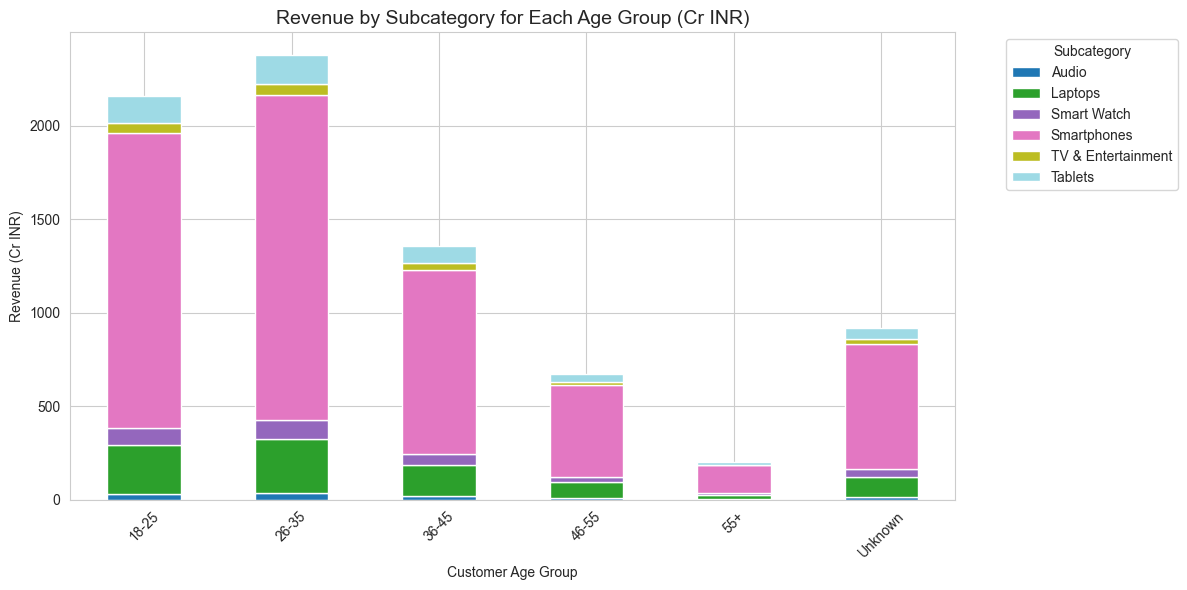

customer_age_group  total_revenue_cr  average_order_value
1              26-35           2379.30             68390.68
0              18-25           2158.45             68213.73
2              36-45           1354.67             68039.48
5            Unknown            920.45             68023.09
3              46-55            673.88             68060.62
4                55+            202.12             67691.33

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\3986074329.py:134: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




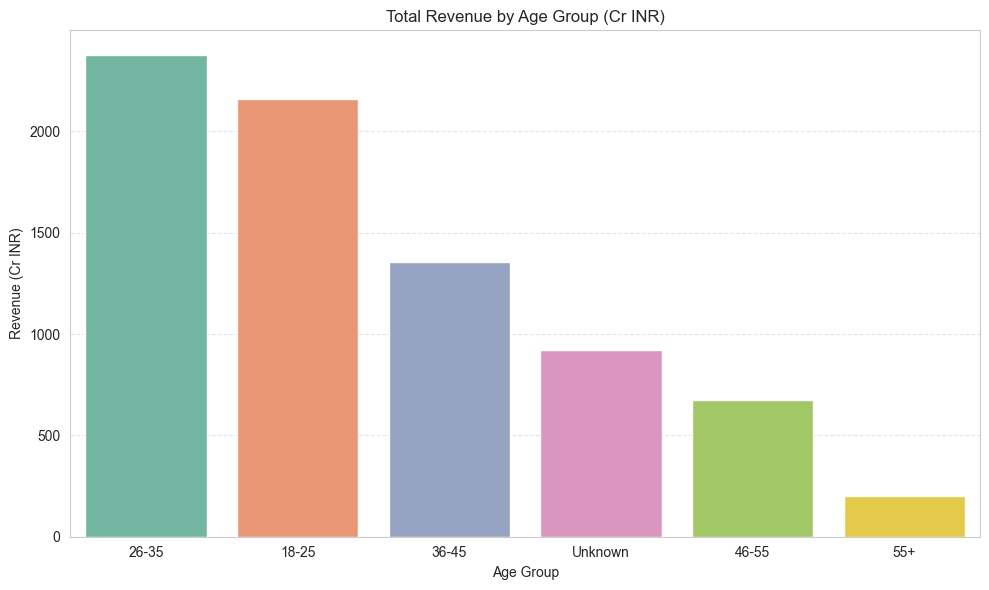

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\3986074329.py:151: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




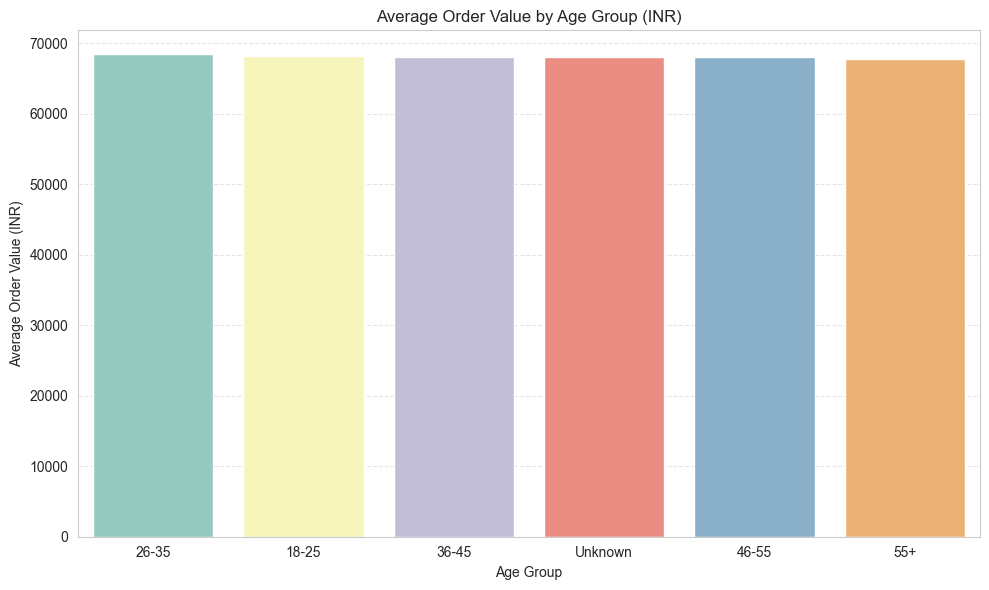

Order frequency by customer age group:


customer_age_group  order_count
1              26-35       347899
0              18-25       316424
2              36-45       199100
5            Unknown       135315
3              46-55        99012
4                55+        29859

C:\Users\Dell\AppData\Local\Temp\ipykernel_2852\3986074329.py:182: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
age_summary = (
    amazon_india_2015_2025
    .groupby('customer_age_group')
    .agg(
        customer_count=('customer_age_group', 'size'),  # total orders/rows per age group
        total_revenue_cr=('final_amount_inr', lambda x: round(x.sum()/1e7, 2))  # revenue in Cr
    )
    .sort_values('customer_count', ascending=False)
    .reset_index()
)

print("Customer Distribution and Revenue by Age Group:")
display(age_summary)

# Sort by customer count for better visualization
age_summary = age_summary.sort_values('customer_count', ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for customer count
sns.barplot(
    x='customer_age_group',
    y='customer_count',
    data=age_summary,
    palette='Set2',
    ax=ax1
)

ax1.set_xlabel('Customer Age Group')
ax1.set_ylabel('Number of Orders', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Add a second y-axis for revenue
ax2 = ax1.twinx()
sns.lineplot(
    x='customer_age_group',
    y='total_revenue_cr',
    data=age_summary,
    color='red',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Total Revenue (Cr INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Customer Orders and Revenue by Age Group', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Aggregate order count and revenue by customer age group
age_summary = (
    amazon_india_2015_2025
    .groupby('customer_age_group')
    .agg(
        order_count=('transaction_id', 'count'),  # total orders
        total_revenue_cr=('final_amount_inr', lambda x: round(x.sum()/1e7, 2))  # revenue in Cr INR
    )
    .sort_values('order_count', ascending=False)
    .reset_index()
)

# Display the table
print("Order Count and Revenue by Customer Age Group:")
display(age_summary)

# ---------------------------
# Aggregate orders and revenue by age group and subcategory
# ---------------------------
age_subcat_summary = (
    amazon_india_2015_2025
    .groupby(['customer_age_group', 'subcategory'])
    .agg(
        order_count=('transaction_id', 'count'),  # total orders
        total_revenue_cr=('final_amount_inr', lambda x: round(x.sum()/1e7, 2))  # revenue in Cr INR
    )
    .reset_index()
    .sort_values(['customer_age_group', 'total_revenue_cr'], ascending=[True, False])
)

# Display
print("Sub-Category Preference by Age Group (Orders & Revenue in Cr INR):")
display(age_subcat_summary)

# ---------------------------
# Pivot table for plotting
# ---------------------------
pivot_table = age_subcat_summary.pivot(
    index='customer_age_group',
    columns='subcategory',
    values='total_revenue_cr'
).fillna(0)

# ---------------------------
# Plot stacked bar chart
# ---------------------------
pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

plt.title('Revenue by Subcategory for Each Age Group (Cr INR)', fontsize=14)
plt.xlabel('Customer Age Group')
plt.ylabel('Revenue (Cr INR)')
plt.xticks(rotation=45)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# ---------------------------
# Aggregate spending by age group
# ---------------------------
age_spending = (
    amazon_india_2015_2025
    .groupby('customer_age_group')
    .agg(
        total_revenue_cr=('final_amount_inr', lambda x: round(x.sum()/1e7, 2)),
        average_order_value=('final_amount_inr', lambda x: round(x.mean(), 2))
    )
    .reset_index()
    .sort_values('total_revenue_cr', ascending=False)
)

display(age_spending)

# ---------------------------
# Bar chart: total revenue
# ---------------------------
plt.figure(figsize=(10,6))
sns.barplot(
    data=age_spending,
    x='customer_age_group',
    y='total_revenue_cr',
    palette='Set2'
)
plt.title('Total Revenue by Age Group (Cr INR)')
plt.xlabel('Age Group')
plt.ylabel('Revenue (Cr INR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------
# Bar chart: average order value
# ---------------------------
plt.figure(figsize=(10,6))
sns.barplot(
    data=age_spending,
    x='customer_age_group',
    y='average_order_value',
    palette='Set3'
)
plt.title('Average Order Value by Age Group (INR)')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# ---------------------------
# 1) Compute order frequency by age group
# ---------------------------
age_freq = (
    amazon_india_2015_2025
    .groupby('customer_age_group')
    .agg(order_count=('transaction_id', 'count'))  # number of orders
    .reset_index()
    .sort_values('order_count', ascending=False)
)

# Display the table
print("Order frequency by customer age group:")
display(age_freq)

# ---------------------------
# 2) Bar chart: order frequency
# ---------------------------
plt.figure(figsize=(10,5))
sns.barplot(
    x='customer_age_group',
    y='order_count',
    data=age_freq,
    palette='Set2'
)
plt.title('Shopping Frequency by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


10.Build price vs demand analysis

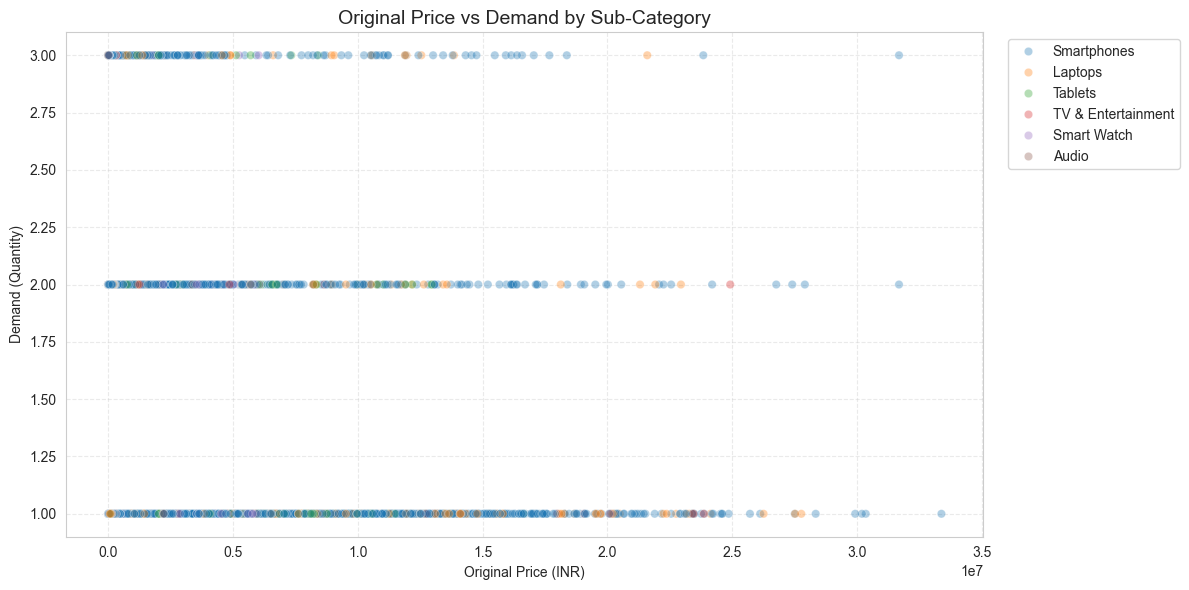

Price vs Demand Correlation by Sub-Category (Original Price):


C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\38002318.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['original_price_inr'].corr(x['quantity']))


subcategory  price_demand_correlation
4  TV & Entertainment                 -0.007511
0               Audio                 -0.004188
2         Smart Watch                 -0.001952
5             Tablets                 -0.001855
3         Smartphones                  0.000068
1             Laptops                  0.002123

Price vs Demand Correlation by Age Group (Original Price):


C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\38002318.py:80: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['original_price_inr'].corr(x['quantity']))


customer_age_group  price_demand_correlation
4                55+                 -0.004051
5            Unknown                 -0.002756
0              18-25                 -0.001090
1              26-35                  0.000456
2              36-45                  0.001720
3              46-55                  0.002464

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Prepare data
# ---------------------------
df = amazon_india_2015_2025.copy()

# Ensure numeric
df['original_price_inr'] = pd.to_numeric(df['original_price_inr'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=[
    'original_price_inr',
    'quantity',
    'subcategory',
    'customer_age_group'
])

# =====================================================
# 1️⃣ Scatter Plot: Original Price vs Demand (Sub-Category)
# =====================================================
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='original_price_inr',
    y='quantity',
    hue='subcategory',
    alpha=0.35
)

plt.title('Original Price vs Demand by Sub-Category', fontsize=14)
plt.xlabel('Original Price (INR)')
plt.ylabel('Demand (Quantity)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# =====================================================
# 2️⃣ Scatter Plot: Original Price vs Demand (Age Group)
# =====================================================
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='original_price_inr',
    y='quantity',
    hue='customer_age_group',
    alpha=0.35
)

plt.title('Original Price vs Demand by Customer Age Group', fontsize=14)
plt.xlabel('Original Price (INR)')
plt.ylabel('Demand (Quantity)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# =====================================================
# 3️⃣ Correlation Table: Sub-Category Level
# =====================================================
subcat_corr = (
    df.groupby('subcategory')
    .apply(lambda x: x['original_price_inr'].corr(x['quantity']))
    .reset_index(name='price_demand_correlation')
    .sort_values('price_demand_correlation')
)

print("Price vs Demand Correlation by Sub-Category (Original Price):")
display(subcat_corr)

# =====================================================
# 4️⃣ Correlation Table: Age Group Level
# =====================================================
age_corr = (
    df.groupby('customer_age_group')
    .apply(lambda x: x['original_price_inr'].corr(x['quantity']))
    .reset_index(name='price_demand_correlation')
    .sort_values('price_demand_correlation')
)

print("Price vs Demand Correlation by Age Group (Original Price):")
display(age_corr)

# =====================================================
# 5️⃣ Correlation Matrix: Pricing Strategy vs Demand
# =====================================================
pricing_corr = df[[
    'original_price_inr',
    'discount_percent',
    'discounted_price_inr',
    'quantity'
]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    pricing_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Matrix: Pricing Strategy vs Demand')
plt.tight_layout()
plt.show()



11.Delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.


Overall On-Time Delivery Rate: 87.55%


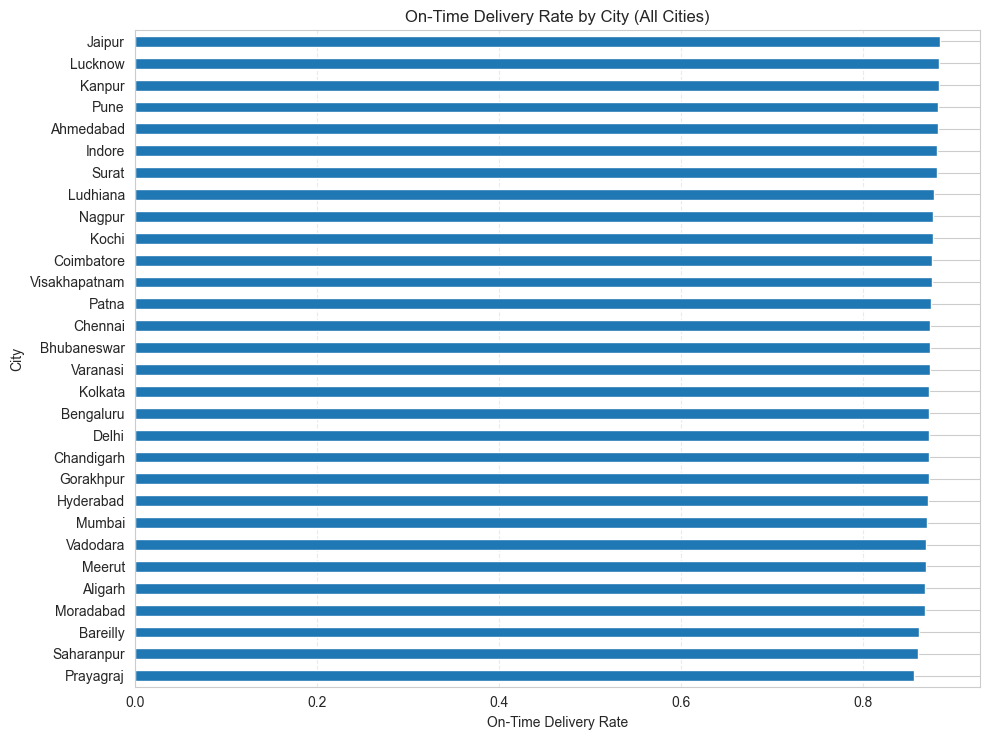

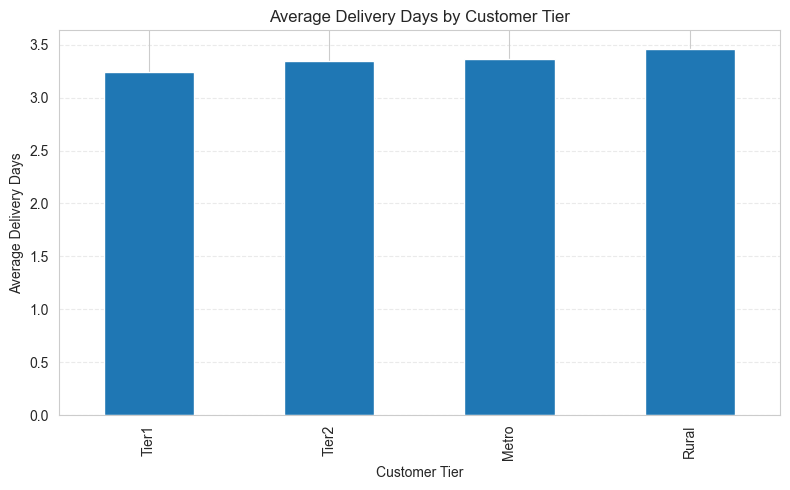

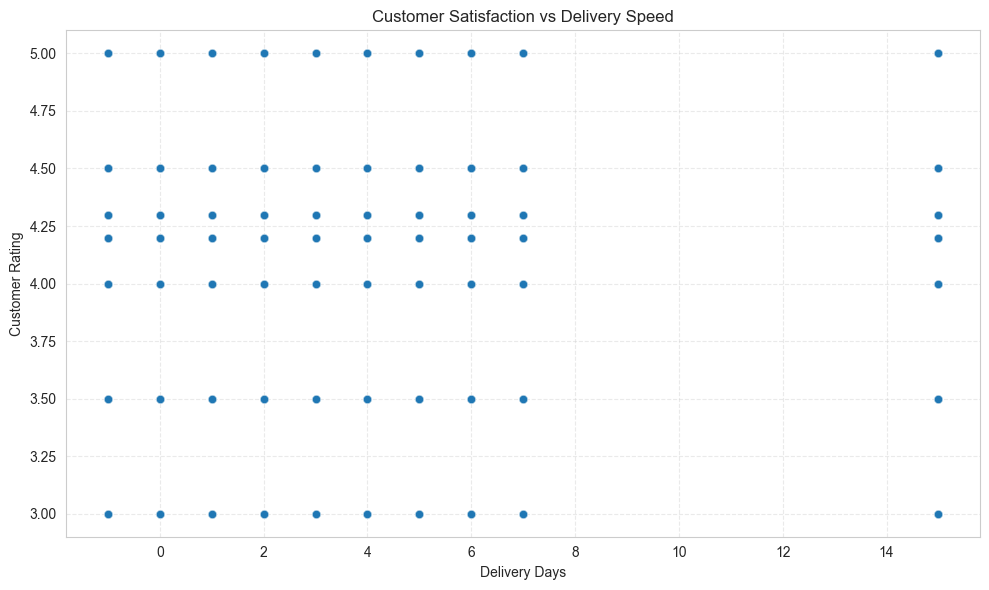

Correlation between Delivery Days and Customer Rating:
                 delivery_days  customer_rating
delivery_days         1.000000        -0.038357
customer_rating      -0.038357         1.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# Data preparation
# ----------------------------------
df = df.copy()

# Ensure numeric columns
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=[
    'delivery_days',
    'customer_rating',
    'customer_city',
    'customer_tier'
])

# ----------------------------------
# STEP 1: Delivery Days Distribution
# ----------------------------------
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_days'], bins=15, kde=True)
plt.title('Distribution of Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 2: On-Time Delivery Performance
# ----------------------------------
df['on_time_delivery'] = df['delivery_days'] <= 5

on_time_rate = df['on_time_delivery'].mean() * 100
print(f"Overall On-Time Delivery Rate: {on_time_rate:.2f}%")

# ----------------------------------
# STEP 3: On-Time Performance by City
# ----------------------------------
city_on_time = (
    df.groupby('customer_city')['on_time_delivery']
    .mean()
    .sort_values()
)

plt.figure(figsize=(10, max(6, len(city_on_time)*0.25)))
city_on_time.plot(kind='barh')

plt.title('On-Time Delivery Rate by City (All Cities)')
plt.xlabel('On-Time Delivery Rate')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# ----------------------------------
# STEP 4: Delivery Performance by Customer Tier
# ----------------------------------
tier_delivery = (
    df.groupby('customer_tier')['delivery_days']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
tier_delivery.plot(kind='bar')
plt.title('Average Delivery Days by Customer Tier')
plt.xlabel('Customer Tier')
plt.ylabel('Average Delivery Days')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 5: Customer Satisfaction vs Delivery Speed
# ----------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='delivery_days',
    y='customer_rating',
    alpha=0.4
)
plt.title('Customer Satisfaction vs Delivery Speed')
plt.xlabel('Delivery Days')
plt.ylabel('Customer Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 6: Correlation Between Delivery Speed & Satisfaction
# ----------------------------------
delivery_corr = df[['delivery_days', 'customer_rating']].corr()
print("Correlation between Delivery Days and Customer Rating:")
print(delivery_corr)

# ----------------------------------
# STEP 7: Delivery Speed Distribution by Customer Tier
# ----------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='customer_tier',
    y='delivery_days'
)
plt.title('Delivery Speed Distribution by Customer Tier')
plt.xlabel('Customer Tier')
plt.ylabel('Delivery Days')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


12.Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories

Overall Return Rate: 7.01%


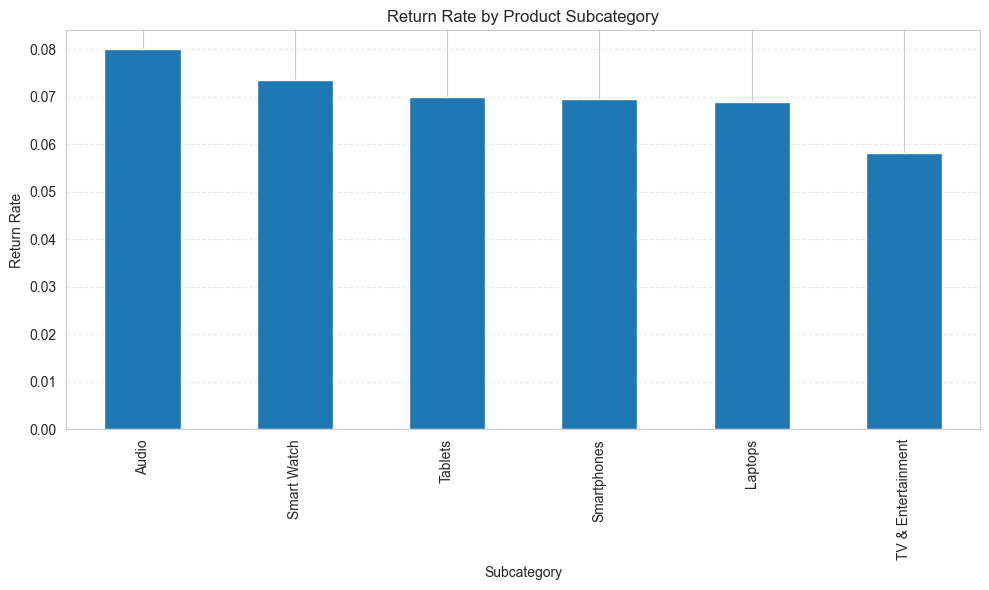

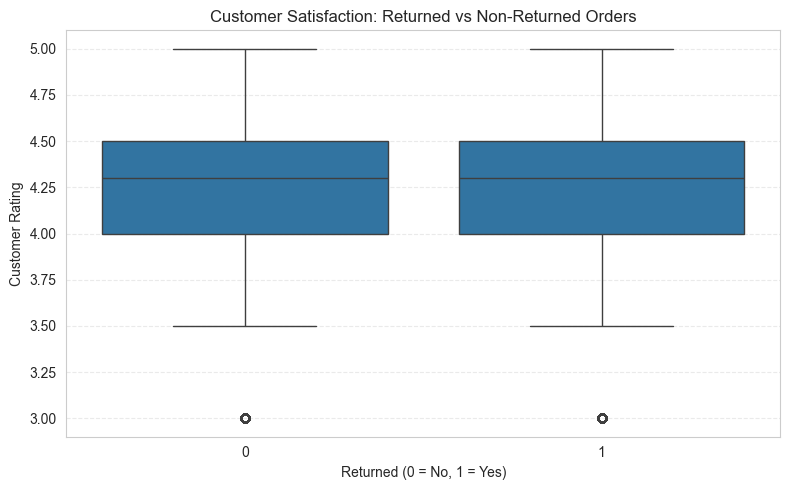

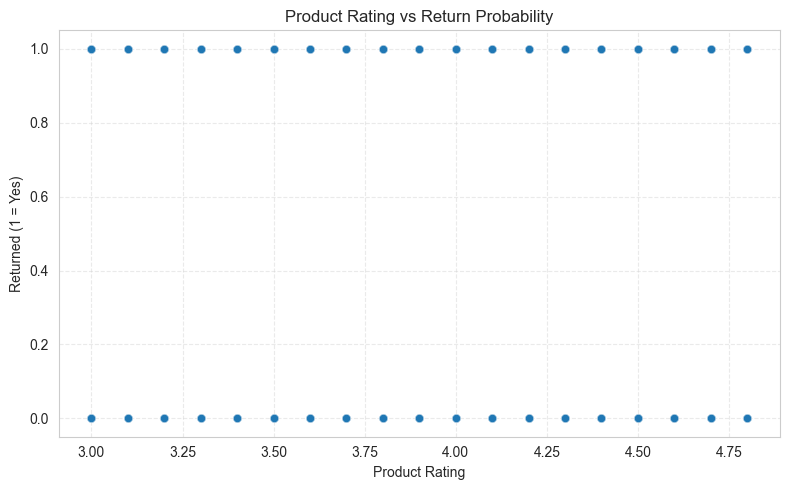

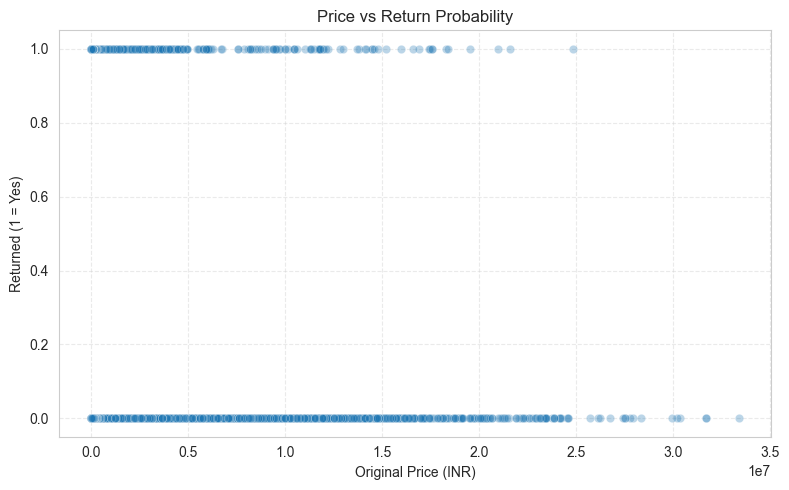

subcategory  Total_Orders  Returned_Orders  Return_Rate_Percent
0               Audio         50100             4008                 8.00
2         Smart Watch         73950             5439                 7.35
5             Tablets         69520             4863                 7.00
3         Smartphones        818870            57004                 6.96
1             Laptops         87525             6026                 6.88
4  TV & Entertainment         16324              950                 5.82

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# Data Preparation
# ----------------------------------
df = df.copy()

# Ensure numeric
df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')
df['original_price_inr'] = pd.to_numeric(df['original_price_inr'], errors='coerce')

# Create return flag
df['is_returned'] = df['return_status'].apply(lambda x: 1 if x == 'Returned' else 0)

# Drop invalid rows
df = df.dropna(subset=[
    'subcategory',
    'product_rating',
    'original_price_inr'
])

# ----------------------------------
# STEP 1: Overall Return Rate
# ----------------------------------
return_rate = df['is_returned'].mean() * 100
print(f"Overall Return Rate: {return_rate:.2f}%")

# ----------------------------------
# STEP 2: Return Rate by Subcategory
# ----------------------------------
subcategory_returns = (
    df.groupby('subcategory')['is_returned']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
subcategory_returns.plot(kind='bar')
plt.title('Return Rate by Product Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Return Rate')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 3: Customer Satisfaction vs Returns
# ----------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='is_returned',
    y='customer_rating'
)
plt.title('Customer Satisfaction: Returned vs Non-Returned Orders')
plt.xlabel('Returned (0 = No, 1 = Yes)')
plt.ylabel('Customer Rating')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 4: Product Rating vs Return Probability
# ----------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='product_rating',
    y='is_returned',
    alpha=0.3
)
plt.title('Product Rating vs Return Probability')
plt.xlabel('Product Rating')
plt.ylabel('Returned (1 = Yes)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 5: Price vs Return Probability
# ----------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='original_price_inr',
    y='is_returned',
    alpha=0.3
)
plt.title('Price vs Return Probability')
plt.xlabel('Original Price (INR)')
plt.ylabel('Returned (1 = Yes)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 6: Correlation Analysis
# ----------------------------------
return_corr = df[[
    'is_returned',
    'product_rating',
    'original_price_inr'
]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    return_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title('Correlation: Returns, Ratings, and Price')
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 7: Return Rate by Subcategory
# ----------------------------------

subcategory_return_table = (
    df.groupby('subcategory')
    .agg(
        Total_Orders=('return_status', 'count'),
        Returned_Orders=('return_status', lambda x: (x == 'Returned').sum()),
        Return_Rate_Percent=('return_status', lambda x: round((x == 'Returned').mean() * 100, 2))
    )
    .reset_index()
    .sort_values('Return_Rate_Percent', ascending=False)
)

subcategory_return_table



13.Study brand performance and market share evolution, brand comparison charts, market share trends, and competitive positioning analysis across different categories.

brand         subcategory  Total_Units_Sold  Total_Revenue_Cr
31         Samsung         Smartphones            240231           1811.48
6            Apple         Smartphones            101778           1394.01
24         OnePlus         Smartphones            197218           1148.84
39          Xiaomi         Smartphones            162957            419.57
37            Vivo         Smartphones             87901            232.62
26            Oppo         Smartphones             87993            224.61
28          Realme         Smartphones             84571            210.49
2        Alienware             Laptops             18058            164.29
0             ASUS             Laptops             16029            144.55
1             Acer             Laptops             17358            140.51
18          Lenovo             Tablets             16526            114.32
19             MSI             Laptops             12524            107.25
32         Samsung  TV & Entertainment             12452            102.24
33         Samsung             Tablets             14449             99.65
10            Dell             Laptops             11598             96.85
4            Apple             Laptops             10762             96.58
7            Apple             Tablets             17582             94.88
17          Lenovo             Laptops             11551             92.10
14              HP             Laptops             11323             89.63
16              LG  TV & Entertainment              7885             88.23
29          Realme             Tablets             12870             73.95
20        Motorola         Smartphones             42750             71.54
40          Xiaomi             Tablets             14992             64.11
25         OnePlus             Tablets             10547             56.16
38          Xiaomi         Smart Watch             15696             55.93
13          Garmin         Smart Watch             13626             48.63
12          Fitbit         Smart Watch             13052             44.84
21           Noise         Smart Watch             12867             42.91
22         Nothing         Smartphones             14310             40.53
3          Amazfit         Smart Watch             10559             37.96
11      Fire-Boltt         Smart Watch              9838             30.74
5            Apple         Smart Watch              8312             29.72
30         Samsung         Smart Watch              8412             27.56
8   Audio-Technica               Audio             10689             19.38
15             JBL               Audio              9514             17.51
23         OnePlus               Audio              8183             15.29
27          Realme               Audio              7412             14.10
36            Sony               Audio              7404             13.01
34      Sennheiser               Audio              7791             12.77
9             Boat               Audio              5973              9.17
35      Skullcandy               Audio              5538              8.79
41            iQOO         Smartphones              4378              4.46

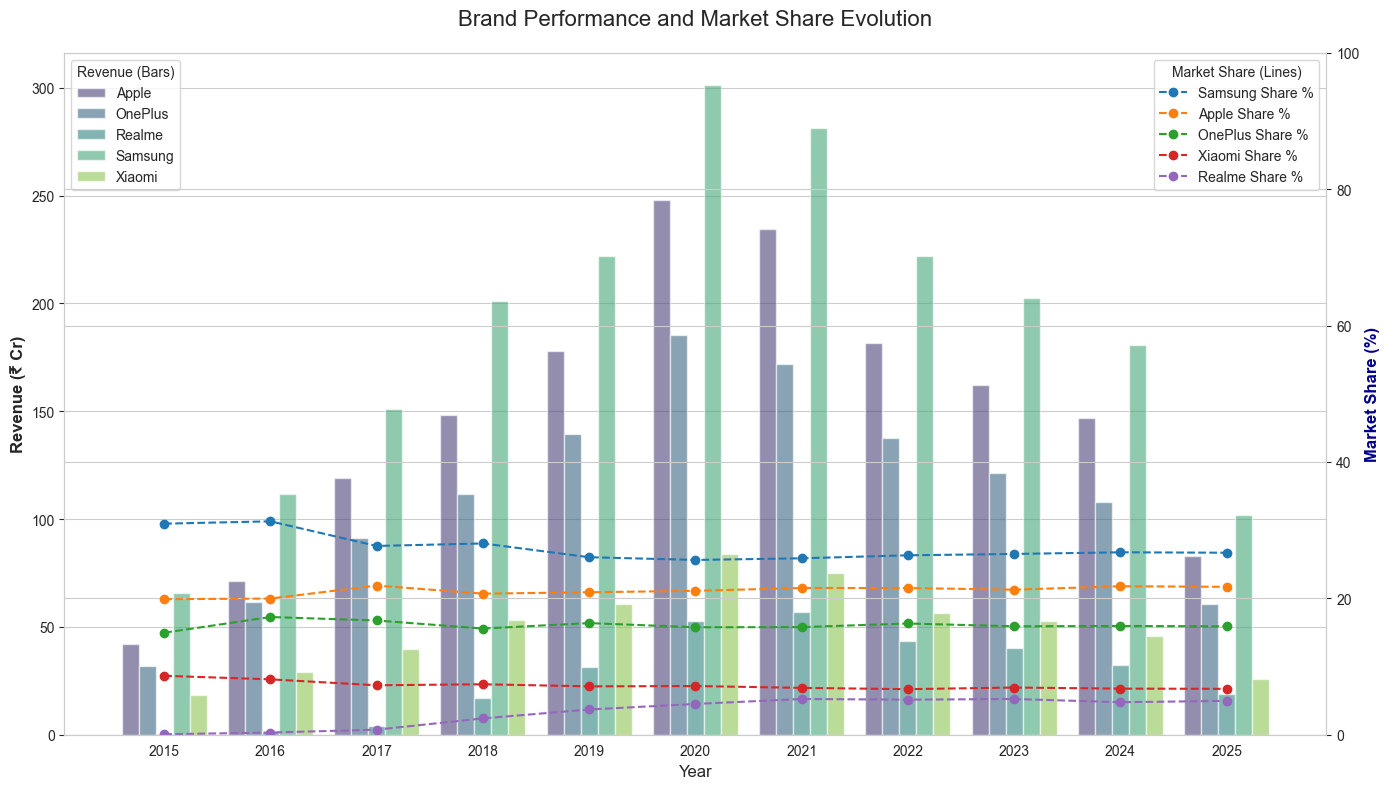

Top 5  Brands Market Share Evolution:


order_year   2015   2016   2017   2018   2019   2020   2021   2022   2023  \
brand                                                                       
Apple       19.87  19.97  21.87  20.69  20.89  21.10  21.52  21.51  21.27   
OnePlus     14.96  17.26  16.75  15.57  16.37  15.76  15.78  16.31  15.90   
Realme       0.07   0.32   0.74   2.39   3.70   4.51   5.24   5.14   5.24   
Samsung     30.95  31.29  27.68  28.05  26.03  25.63  25.87  26.31  26.51   
Xiaomi       8.64   8.12   7.25   7.40   7.09   7.14   6.87   6.68   6.92   

order_year   2024   2025  
brand                     
Apple       21.77  21.69  
OnePlus     15.95  15.89  
Realme       4.77   4.96  
Samsung     26.75  26.69  
Xiaomi       6.76   6.73

Market Share Evolution Table (Sorted by 2025):


order_year       2015   2016   2017   2018   2019   2020   2021   2022   2023  \
brand                                                                           
Samsung         30.95  31.29  27.68  28.05  26.03  25.63  25.87  26.31  26.51   
Apple           19.87  19.97  21.87  20.69  20.89  21.10  21.52  21.51  21.27   
OnePlus         14.96  17.26  16.75  15.57  16.37  15.76  15.78  16.31  15.90   
Xiaomi           8.64   8.12   7.25   7.40   7.09   7.14   6.87   6.68   6.92   
Realme           0.07   0.32   0.74   2.39   3.70   4.51   5.24   5.14   5.24   
Nothing          0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.51   1.56   
Lenovo           1.96   3.10   2.45   2.61   2.92   2.90   2.84   2.47   2.77   
Oppo             0.00   0.00   2.60   3.21   3.39   3.85   3.90   3.22   2.63   
Vivo             0.00   0.00   2.64   3.53   3.94   3.87   3.89   3.15   2.73   
Alienware        5.43   2.10   1.76   1.77   2.54   2.42   1.93   1.91   2.02   
MSI              2.08   1.01   1.36   1.16   1.11   1.57   1.26   1.60   1.50   
ASUS             1.50   3.29   2.58   2.61   2.04   1.69   1.67   1.90   1.51   
Acer             2.04   2.36   2.39   2.55   2.13   1.93   1.66   1.53   1.41   
Dell             0.31   0.91   1.43   1.32   1.18   1.55   1.33   1.37   1.21   
HP               1.70   1.74   1.29   1.23   1.14   1.06   1.12   1.13   1.13   
LG               2.42   1.53   1.83   1.39   1.30   1.05   0.87   0.75   1.00   
Fire-Boltt       0.41   0.23   0.29   0.26   0.31   0.26   0.43   0.44   0.52   
Garmin           1.78   0.98   0.65   0.51   0.50   0.49   0.55   0.71   0.68   
Noise            1.30   0.76   0.66   0.54   0.45   0.44   0.46   0.50   0.64   
Fitbit           0.89   0.92   0.79   0.61   0.50   0.58   0.47   0.47   0.52   
Amazfit          0.00   0.00   0.31   0.35   0.53   0.54   0.58   0.64   0.63   
Audio-Technica   0.34   0.27   0.19   0.16   0.29   0.23   0.25   0.27   0.27   
iQOO             0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.08   0.16   
Skullcandy       0.03   0.05   0.03   0.03   0.04   0.04   0.17   0.21   0.20   
JBL              0.07   0.25   0.28   0.26   0.23   0.21   0.23   0.22   0.22   
Motorola         3.10   3.16   1.89   1.36   1.00   0.73   0.60   0.48   0.36   
Sennheiser       0.06   0.05   0.03   0.17   0.12   0.16   0.22   0.22   0.20   
Sony             0.02   0.26   0.24   0.23   0.18   0.16   0.15   0.11   0.11   
Boat             0.07   0.05   0.03   0.04   0.08   0.14   0.13   0.17   0.16   

order_year       2024   2025  
brand                         
Samsung         26.75  26.69  
Apple           21.77  21.69  
OnePlus         15.95  15.89  
Xiaomi           6.76   6.73  
Realme           4.77   4.96  
Nothing          2.13   2.61  
Lenovo           2.65   2.47  
Oppo             2.29   2.09  
Vivo             2.41   2.03  
Alienware        2.00   1.76  
MSI              1.61   1.58  
ASUS             1.24   1.45  
Acer             1.35   1.26  
Dell             1.12   1.21  
HP               1.09   1.07  
LG               1.05   0.98  
Fire-Boltt       0.68   0.77  
Garmin           0.62   0.72  
Noise            0.63   0.69  
Fitbit           0.63   0.67  
Amazfit          0.62   0.59  
Audio-Technica   0.31   0.31  
iQOO             0.22   0.30  
Skullcandy       0.18   0.28  
JBL              0.23   0.27  
Motorola         0.33   0.27  
Sennheiser       0.20   0.24  
Sony             0.21   0.22  
Boat             0.18   0.20

Competitive Positioning Across Sub-Categories (Market Share %):


C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\1815395199.py:175: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  positioning_table = positioning_table.applymap(lambda x: f"{x:.2f}%")


brand              Samsung   Apple OnePlus  Xiaomi  Realme   Vivo   Oppo  \
subcategory                                                                
Audio                0.00%   0.00%  13.90%   0.00%  12.82%  0.00%  0.00%   
Laptops              0.00%  10.37%   0.00%   0.00%   0.00%  0.00%  0.00%   
Smart Watch          8.66%   9.34%   0.00%  17.57%   0.00%  0.00%  0.00%   
Smartphones         32.59%  25.08%  20.67%   7.55%   3.79%  4.19%  4.04%   
TV & Entertainment  53.68%   0.00%   0.00%   0.00%   0.00%  0.00%  0.00%   
Tablets             19.81%  18.86%  11.16%  12.74%  14.70%  0.00%  0.00%   

brand               Lenovo Alienware    ASUS  ... Nothing Amazfit Fire-Boltt  \
subcategory                                   ...                              
Audio                0.00%     0.00%   0.00%  ...   0.00%   0.00%      0.00%   
Laptops              9.88%    17.63%  15.51%  ...   0.00%   0.00%      0.00%   
Smart Watch          0.00%     0.00%   0.00%  ...   0.00%  11.93%      9.66%   
Smartphones          0.00%     0.00%   0.00%  ...   0.73%   0.00%      0.00%   
TV & Entertainment   0.00%     0.00%   0.00%  ...   0.00%   0.00%      0.00%   
Tablets             22.72%     0.00%   0.00%  ...   0.00%   0.00%      0.00%   

brand              Audio-Technica     JBL    Sony Sennheiser   Boat  \
subcategory                                                           
Audio                      17.62%  15.92%  11.82%     11.60%  8.34%   
Laptops                     0.00%   0.00%   0.00%      0.00%  0.00%   
Smart Watch                 0.00%   0.00%   0.00%      0.00%  0.00%   
Smartphones                 0.00%   0.00%   0.00%      0.00%  0.00%   
TV & Entertainment          0.00%   0.00%   0.00%      0.00%  0.00%   
Tablets                     0.00%   0.00%   0.00%      0.00%  0.00%   

brand              Skullcandy   iQOO  
subcategory                           
Audio                   7.99%  0.00%  
Laptops                 0.00%  0.00%  
Smart Watch             0.00%  0.00%  
Smartphones             0.00%  0.08%  
TV & Entertainment      0.00%  0.00%  
Tablets                 0.00%  0.00%  

[6 rows x 29 columns]

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# Data Preparation
# ----------------------------------
df = df.copy()

required_cols = {
    'brand', 'subcategory', 'order_year',
    'quantity', 'final_amount_inr'
}
df = df.dropna(subset=required_cols)

df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')

# ----------------------------------
# STEP 1: Brand Performance (Revenue & Volume)
# ----------------------------------
brand_performance = (
    df.groupby(['brand', 'subcategory'])
    .agg(
        Total_Units_Sold=('quantity', 'sum'),
        Total_Revenue_Cr=('final_amount_inr', lambda x: round(x.sum() / 1e7, 2))
    )
    .reset_index()
    .sort_values('Total_Revenue_Cr', ascending=False)
)

display(brand_performance)

plt.figure(figsize=(16,6))
plt.bar(
    brand_performance['brand'],
    brand_performance['Total_Revenue_Cr']
)
plt.title('Brand Performance by Revenue (₹ Crores)')
plt.xlabel('Brand')
plt.ylabel('Total Revenue (₹ Cr)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------
# STEP 2: Market Share by Brand
# --------------------------------
# ---------------------------
# 1. Aggregate revenue & market share
# ---------------------------
# Using 'order_year' as per your dataset schema
brand_yearly = (
    df.groupby(['order_year', 'brand'], as_index=False)['final_amount_inr']
    .sum()
)

# Convert Revenue to Crores (₹ Cr)
brand_yearly['revenue_cr'] = (brand_yearly['final_amount_inr'] / 1e7).round(2)

# Calculate Market Share per Year
brand_yearly['market_share_pct'] = (
    brand_yearly['final_amount_inr'] / 
    brand_yearly.groupby('order_year')['final_amount_inr'].transform('sum') * 100
).round(2)

# ---------------------------
# 2. Select top N brands by total revenue
# ---------------------------
top_n = 5
top_brands_list = brand_yearly.groupby('brand')['revenue_cr'].sum().nlargest(top_n).index
brand_top = brand_yearly[brand_yearly['brand'].isin(top_brands_list)]

# ---------------------------
# 3. Plot combined chart
# ---------------------------
fig, ax1 = plt.subplots(figsize=(14, 8))

# Primary Axis: Bar plot for revenue
sns.barplot(
    data=brand_top, 
    x='order_year', 
    y='revenue_cr', 
    hue='brand', 
    palette='viridis', 
    alpha=0.6,
    ax=ax1
)

ax1.set_ylabel('Revenue (₹ Cr)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_title('Brand Performance and Market Share Evolution', fontsize=16, pad=20)
ax1.legend(title='Revenue (Bars)', loc='upper left')

# Secondary Axis: Line plot for market share
ax2 = ax1.twinx()
for brand in top_brands_list:
    brand_data = brand_top[brand_top['brand'] == brand]
    ax2.plot(
        brand_data['order_year'].astype(str), # Ensure x-axis matches bar categories
        brand_data['market_share_pct'], 
        marker='o', 
        linestyle='--', 
        label=f"{brand} Share %"
    )

ax2.set_ylim(0, 100)
ax2.set_ylabel('Market Share (%)', fontsize=12, color='darkblue', fontweight='bold')
ax2.legend(title='Market Share (Lines)', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------
# 4. Display Summary Table
# ---------------------------
market_share_pct = brand_top.pivot(
    index='brand', 
    columns='order_year', 
    values='market_share_pct'
).fillna(0)
print("Top 5  Brands Market Share Evolution:")
display(market_share_pct)

# 1. Calculate yearly revenue per brand
brand_yearly = df.groupby(['order_year', 'brand'])['final_amount_inr'].sum().reset_index()

# 2. Calculate total market revenue per year
total_yearly = df.groupby('order_year')['final_amount_inr'].sum().reset_index()
total_yearly.columns = ['order_year', 'total_revenue']

# 3. Merge and compute Market Share %
market_share_df = pd.merge(brand_yearly, total_yearly, on='order_year')
market_share_df['share_pct'] = (market_share_df['final_amount_inr'] / market_share_df['total_revenue'] * 100).round(2)

# 4. Pivot into a final table
market_share_table = market_share_df.pivot(index='brand', columns='order_year', values='share_pct').fillna(0)

# 5. Sort by the most recent year's performance
latest_year = market_share_table.columns[-1]
market_share_table = market_share_table.sort_values(by=latest_year, ascending=False)

print(f"Market Share Evolution Table (Sorted by {latest_year}):")
display(market_share_table)

# Aggregate revenue per brand per sub-category
subcat_brand = (
    df.groupby(['subcategory', 'brand'], as_index=False)['final_amount_inr']
    .sum()
)

# Convert to Crores
subcat_brand['revenue_cr'] = (subcat_brand['final_amount_inr'] / 1e7).round(2)

# Total revenue per sub-category
total_subcat = subcat_brand.groupby('subcategory')['final_amount_inr'].transform('sum')

# Market share per brand in sub-category
subcat_brand['market_share_pct'] = (subcat_brand['final_amount_inr'] / total_subcat * 100).round(2)

# Pivot: Brands as columns, sub-categories as rows
positioning_table = subcat_brand.pivot(
    index='subcategory',
    columns='brand',
    values='market_share_pct'
).fillna(0)  # Fill missing with 0

# Sort columns by total revenue for easier reading
brand_order = subcat_brand.groupby('brand')['revenue_cr'].sum().sort_values(ascending=False).index
positioning_table = positioning_table[brand_order]

# Format as percentage
positioning_table = positioning_table.applymap(lambda x: f"{x:.2f}%")

print("Competitive Positioning Across Sub-Categories (Market Share %):")
display(positioning_table)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=subcat_brand,
    x='subcategory',
    y='brand',
    size='revenue_cr',
    hue='market_share_pct',
    palette='viridis',
    sizes=(100, 2000),
    alpha=0.7
)
plt.title("Competitive Positioning Across Sub-Categories", fontsize=14, fontweight='bold')
plt.xlabel("Sub-Category")
plt.ylabel("Brand")
plt.xticks(rotation=45)
plt.legend(title="Market Share % / Revenue", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()



14. Customer lifetime value (CLV) analysis

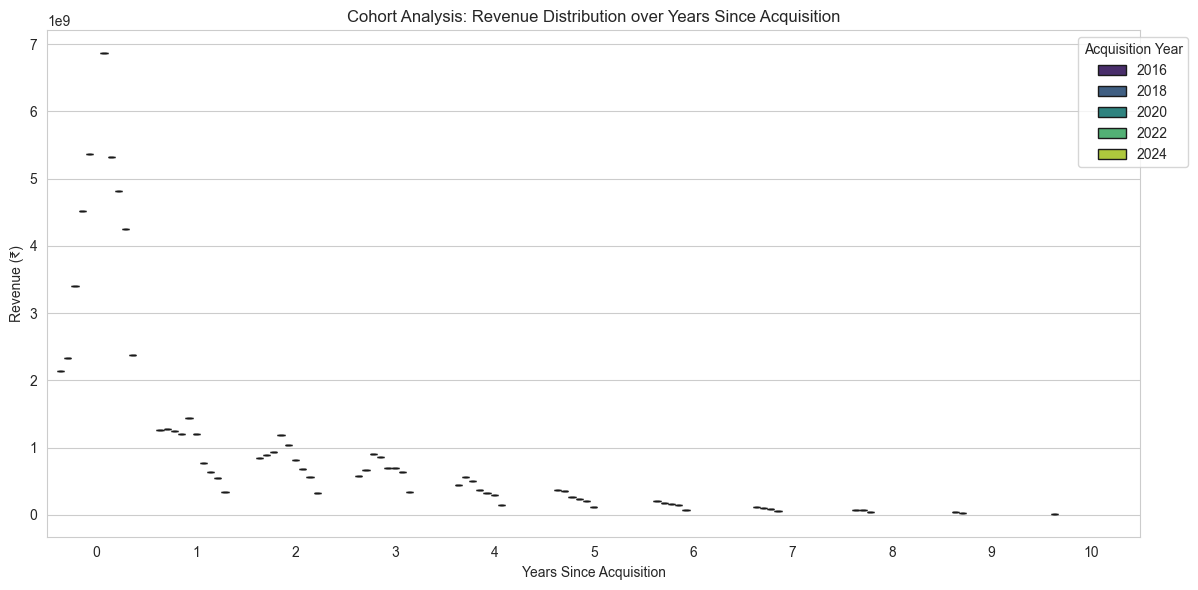

C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_revenue, x='acquisition_year', y='clv', palette='viridis')



CLV by Customer Segment:


C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = customer_revenue.groupby('segment')['clv'].agg(['count','mean','sum']).round(2)


count       mean           sum
segment                                
Low      88743   35906.04  3.186410e+09
Medium   88742   98732.49  8.761719e+09
High     88742  199554.54  1.770887e+10
VIP      88742  532236.51  4.723173e+10

C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_clv, x='customer_tier', y='clv', order=tier_order, palette='muted')


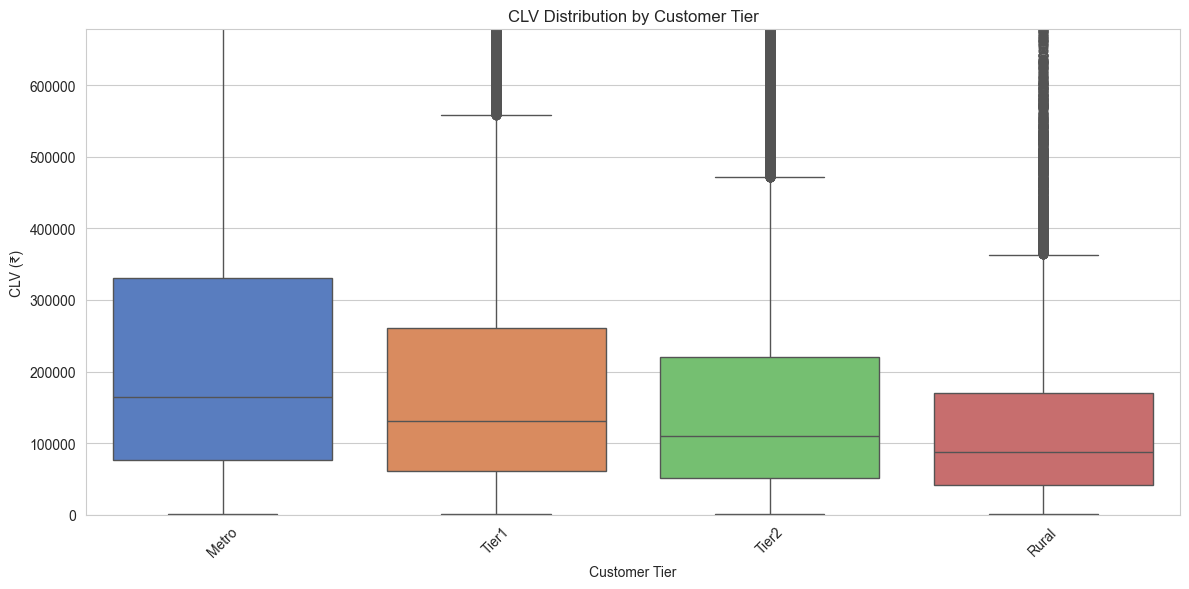


CLV by Customer Tier:


count       mean     median           sum
customer_tier                                            
Metro          168261  252140.50  163973.33  4.242541e+10
Rural           17405  133500.91   87759.01  2.323583e+09
Tier1          110806  200258.85  131573.08  2.218988e+10
Tier2           58497  170091.66  110529.21  9.949852e+09

C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_clv, x='customer_spending_tier', y='clv', order=spending_order, palette='coolwarm')


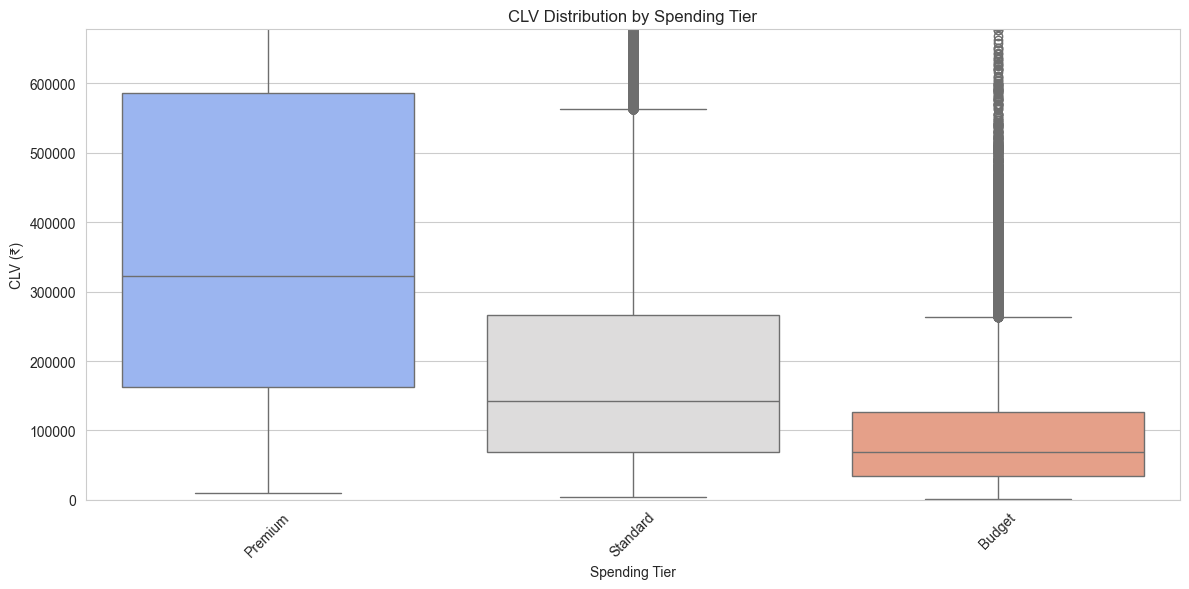


CLV by Spending Tier:


count       mean     median           sum
customer_spending_tier                                            
Budget                   74563   94040.61   69689.67  7.011950e+09
Premium                  63942  431121.05  322513.10  2.756674e+10
Standard                216464  195459.93  142189.35  4.231004e+10

C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_clv, x='customer_age_group', y='clv', order=age_order, palette='Set2')


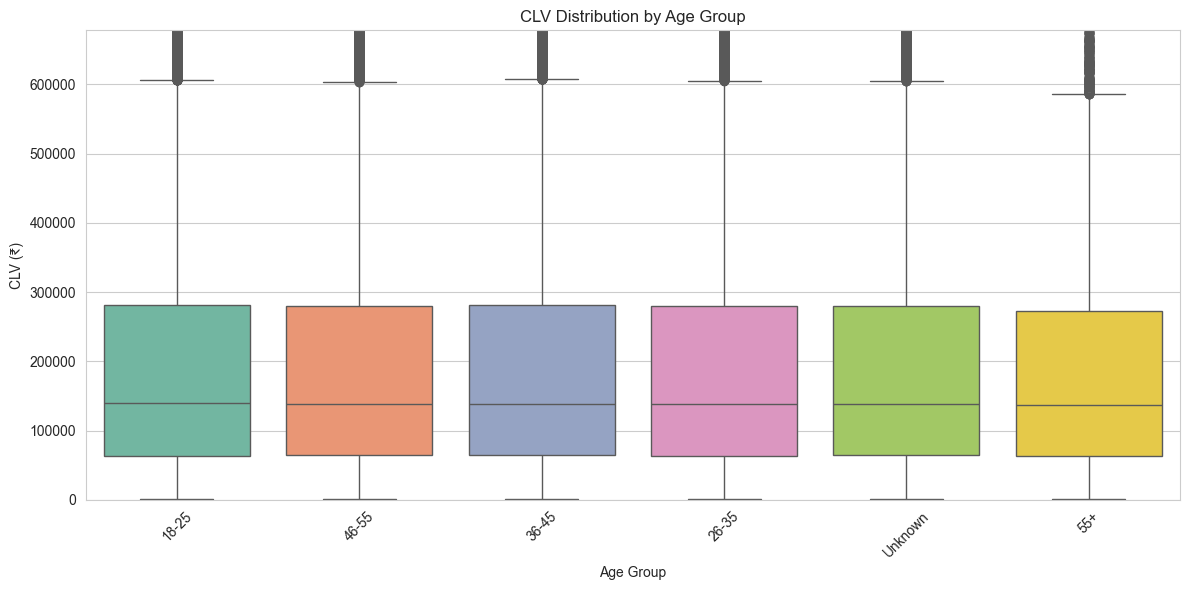


CLV by Age Group:


count       mean     median           sum
customer_age_group                                            
18-25                99379  217184.69  139271.26  2.158360e+10
26-35               109873  216515.07  137751.96  2.378916e+10
36-45                62562  216588.96  138260.64  1.355024e+10
46-55                31096  216607.34  138610.16  6.735622e+09
55+                   9436  212890.65  137437.74  2.008836e+09
Unknown              42623  216345.07  138648.07  9.221276e+09

C:\Users\Dell\AppData\Local\Temp\ipykernel_25896\932723627.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_clv, x='is_prime_member', y='clv', palette=['lightcoral','lightgreen'])


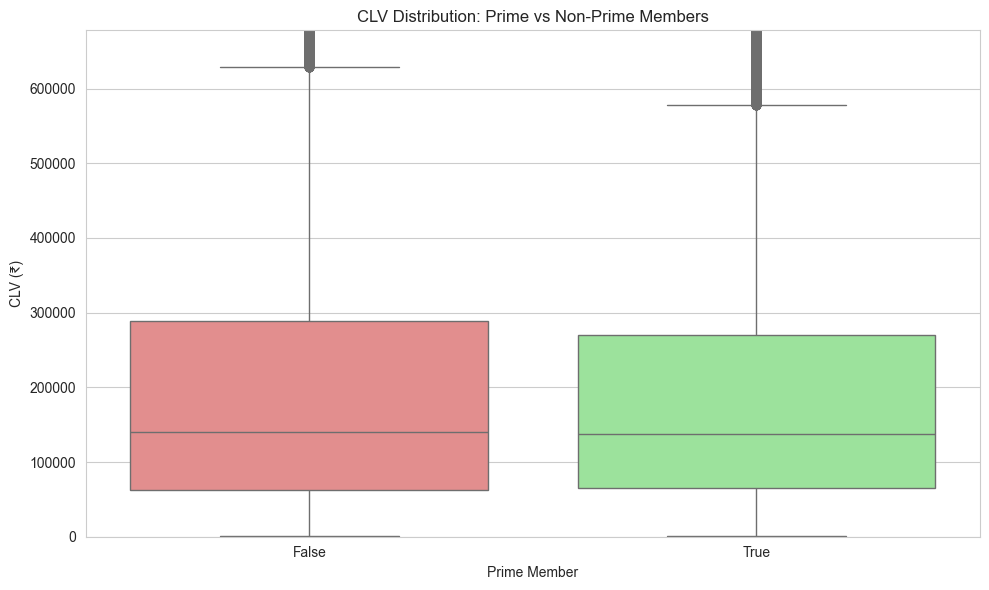


CLV by Prime Membership:


count       mean     median           sum
is_prime_member                                            
False            194307  222997.22  139618.76  4.332992e+10
True             160662  208878.33  137245.10  3.355881e+10

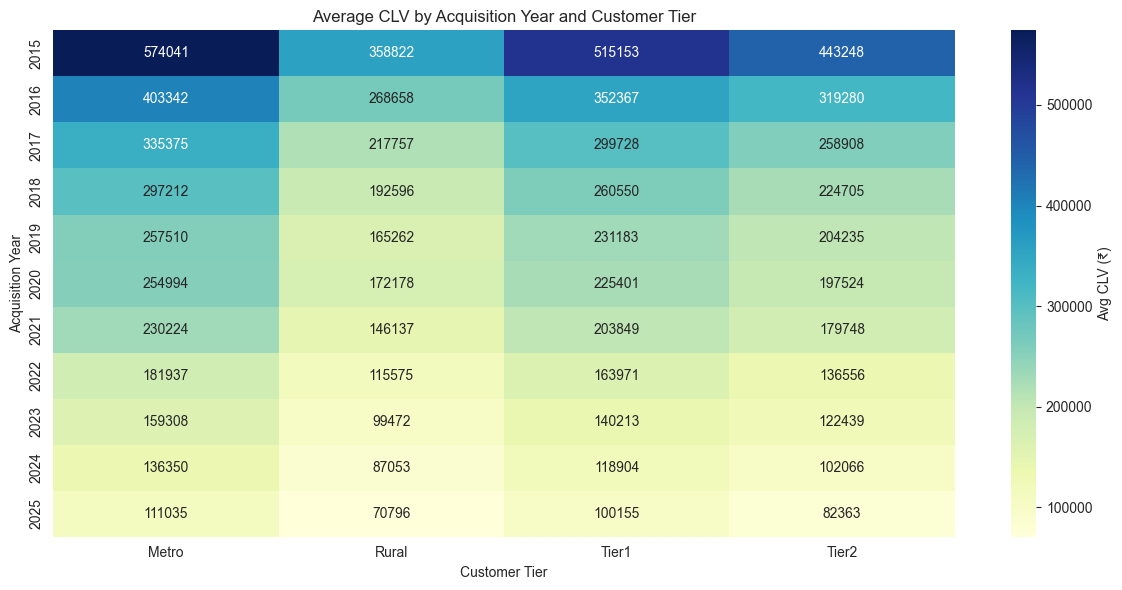

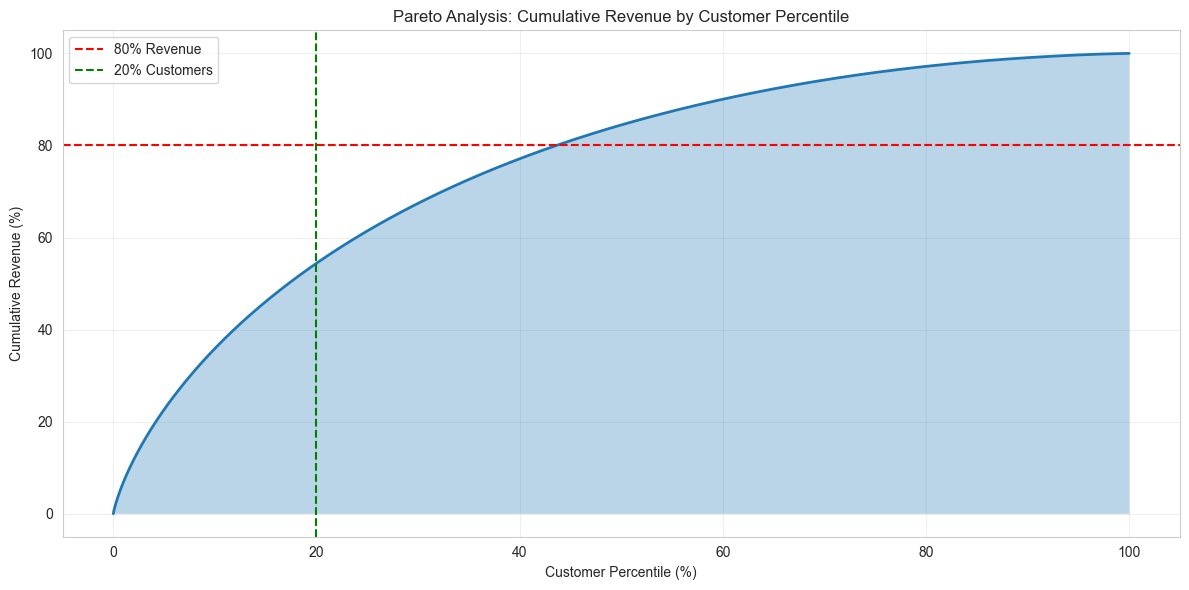


Pareto Analysis:


Metric  Value
0  Top Customer % for 80% Revenue  43.6%


Summary Statistics:


Metric              Value
0    Total Customers            354,969
1  Total Revenue (₹)  76,888,729,563.25
2    Average CLV (₹)         216,606.89
3     Median CLV (₹)         138,460.28
4    Std Dev CLV (₹)         238,806.45


CLV Percentiles:


Percentile       CLV (₹)
0        P10     30,377.56
1        P25     63,954.25
2        P50    138,460.28
3        P75    280,481.84
4        P90    494,810.70
5        P95    677,889.95
6        P99  1,165,074.08

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=amazon_india_2015_2025.copy()

sns.set_style("whitegrid")

# ---------------------------
# Step 0: Prepare Data
# ---------------------------
df['order_date'] = pd.to_datetime(df['order_date'])

# Acquisition year per customer
df['acquisition_year'] = df.groupby('customer_id')['order_date'].transform('min').dt.year

# Order year
df['order_year'] = df['order_date'].dt.year

# ---------------------------
# Step 1: Cohort Analysis (Revenue by Year)
# ---------------------------
# Total revenue per customer per year
cohort_data = df.groupby(['acquisition_year', 'order_year', 'customer_id'])['final_amount_inr'].sum().reset_index()

# Revenue per cohort per year
cohort_revenue = cohort_data.groupby(['acquisition_year', 'order_year'])['final_amount_inr'].sum().reset_index()

# Cohort period in years
cohort_revenue['cohort_period'] = cohort_revenue['order_year'] - cohort_revenue['acquisition_year']

# Convert to long format for boxplot
cohort_long = cohort_revenue[['acquisition_year', 'cohort_period', 'final_amount_inr']]

# Limit revenue to 99th percentile
revenue_cap = cohort_long['final_amount_inr'].quantile(0.99)
cohort_long_filtered = cohort_long[cohort_long['final_amount_inr'] <= revenue_cap]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=cohort_long_filtered,
    x='cohort_period',
    y='final_amount_inr',
    hue='acquisition_year',
    palette='viridis'
)
plt.title("Cohort Analysis: Revenue Distribution over Years Since Acquisition")
plt.xlabel("Years Since Acquisition")
plt.ylabel("Revenue (₹)")
plt.legend(title="Acquisition Year", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

# ---------------------------
# Step 2: Retention Curves
# ---------------------------
# Mark if customer purchased in a year
customer_year = df.groupby(['customer_id', 'order_year'])['final_amount_inr'].sum().reset_index()
customer_year['purchased'] = 1

# Pivot for retention matrix
cohort_pivot = customer_year.pivot_table(
    index='customer_id',
    columns='order_year',
    values='purchased',
    fill_value=0
)

# Acquisition year per customer
acquisition = df.groupby('customer_id')['order_year'].min()
cohort_pivot['acquisition_year'] = acquisition

# Retention rate per acquisition year
retention = cohort_pivot.groupby('acquisition_year').mean().drop(columns=['acquisition_year'], errors='ignore').fillna(0)

plt.figure(figsize=(12,6))
for cohort in retention.index:
    plt.plot(range(retention.shape[1]), retention.loc[cohort], marker='o', label=str(cohort))
plt.title("Customer Retention Curves by Acquisition Year")
plt.xlabel("Years Since First Purchase")
plt.ylabel("Retention Rate")
plt.legend(title="Acquisition Year", bbox_to_anchor=(1.05,1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------
# Step 3: Customer Lifetime Value (CLV)
# ---------------------------
customer_revenue = df.groupby('customer_id')['final_amount_inr'].sum().reset_index()
customer_revenue.columns = ['customer_id', 'clv']
customer_revenue['acquisition_year'] = df.groupby('customer_id')['order_date'].min().dt.year.values

# Histogram of CLV
plt.figure(figsize=(12,6))
sns.histplot(customer_revenue['clv'], bins=50, kde=True, color='teal')
plt.title("Customer Lifetime Value (CLV) Distribution")
plt.xlabel("CLV (₹)")
plt.ylabel("Number of Customers")
plt.xlim(0, customer_revenue['clv'].quantile(0.99))
plt.show()

# CLV by acquisition year
plt.figure(figsize=(12,6))
sns.boxplot(data=customer_revenue, x='acquisition_year', y='clv', palette='viridis')
plt.title("CLV by Acquisition Year")
plt.ylabel("CLV (₹)")
plt.xlabel("Acquisition Year")
plt.ylim(0, customer_revenue['clv'].quantile(0.95))
plt.show()

# ---------------------------
# Step 4: CLV by Customer Segment
# ---------------------------
# Segment customers into quartiles
customer_revenue['segment'] = pd.qcut(customer_revenue['clv'], 4, labels=['Low','Medium','High','VIP'])

segment_summary = customer_revenue.groupby('segment')['clv'].agg(['count','mean','sum']).round(2)
print("\nCLV by Customer Segment:")
display(segment_summary)

# ---------------------------
# Step 5: CLV by Customer Tier
# ---------------------------
# Merge with customer attributes
customer_attrs = df.groupby('customer_id').agg({
    'customer_tier': 'first',
    'customer_spending_tier': 'first',
    'customer_age_group': 'first',
    'is_prime_member': 'first'
}).reset_index()

customer_clv = customer_revenue.merge(customer_attrs, on='customer_id')

# CLV by Customer Tier
plt.figure(figsize=(12,6))
tier_order = customer_clv.groupby('customer_tier')['clv'].mean().sort_values(ascending=False).index
sns.boxplot(data=customer_clv, x='customer_tier', y='clv', order=tier_order, palette='muted')
plt.title("CLV Distribution by Customer Tier")
plt.ylabel("CLV (₹)")
plt.xlabel("Customer Tier")
plt.ylim(0, customer_clv['clv'].quantile(0.95))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tier_summary = customer_clv.groupby('customer_tier')['clv'].agg(['count','mean','median','sum']).round(2)
print("\nCLV by Customer Tier:")
display(tier_summary)

# ---------------------------
# Step 6: CLV by Spending Tier
# ---------------------------
plt.figure(figsize=(12,6))
spending_order = customer_clv.groupby('customer_spending_tier')['clv'].mean().sort_values(ascending=False).index
sns.boxplot(data=customer_clv, x='customer_spending_tier', y='clv', order=spending_order, palette='coolwarm')
plt.title("CLV Distribution by Spending Tier")
plt.ylabel("CLV (₹)")
plt.xlabel("Spending Tier")
plt.ylim(0, customer_clv['clv'].quantile(0.95))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

spending_summary = customer_clv.groupby('customer_spending_tier')['clv'].agg(['count','mean','median','sum']).round(2)
print("\nCLV by Spending Tier:")
display(spending_summary)

# ---------------------------
# Step 7: CLV by Age Group
# ---------------------------
plt.figure(figsize=(12,6))
age_order = customer_clv.groupby('customer_age_group')['clv'].mean().sort_values(ascending=False).index
sns.boxplot(data=customer_clv, x='customer_age_group', y='clv', order=age_order, palette='Set2')
plt.title("CLV Distribution by Age Group")
plt.ylabel("CLV (₹)")
plt.xlabel("Age Group")
plt.ylim(0, customer_clv['clv'].quantile(0.95))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

age_summary = customer_clv.groupby('customer_age_group')['clv'].agg(['count','mean','median','sum']).round(2)
print("\nCLV by Age Group:")
display(age_summary)

# ---------------------------
# Step 8: CLV by Prime Membership
# ---------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=customer_clv, x='is_prime_member', y='clv', palette=['lightcoral','lightgreen'])
plt.title("CLV Distribution: Prime vs Non-Prime Members")
plt.ylabel("CLV (₹)")
plt.xlabel("Prime Member")
plt.ylim(0, customer_clv['clv'].quantile(0.95))
plt.tight_layout()
plt.show()

prime_summary = customer_clv.groupby('is_prime_member')['clv'].agg(['count','mean','median','sum']).round(2)
print("\nCLV by Prime Membership:")
display(prime_summary)

# ---------------------------
# Step 9: CLV by Acquisition Year & Segment
# ---------------------------
# Heatmap of average CLV
clv_by_year_tier = customer_clv.groupby(['acquisition_year','customer_tier'])['clv'].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(clv_by_year_tier, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Avg CLV (₹)'})
plt.title("Average CLV by Acquisition Year and Customer Tier")
plt.xlabel("Customer Tier")
plt.ylabel("Acquisition Year")
plt.tight_layout()
plt.show()

# ---------------------------
# Step 10: Pareto Analysis (80-20 Rule)
# ---------------------------
customer_clv_sorted = customer_clv.sort_values('clv', ascending=False).reset_index(drop=True)
customer_clv_sorted['cumulative_revenue'] = customer_clv_sorted['clv'].cumsum()
customer_clv_sorted['cumulative_revenue_pct'] = (customer_clv_sorted['cumulative_revenue'] / customer_clv_sorted['clv'].sum()) * 100
customer_clv_sorted['customer_pct'] = ((customer_clv_sorted.index + 1) / len(customer_clv_sorted)) * 100

plt.figure(figsize=(12,6))
plt.plot(customer_clv_sorted['customer_pct'], customer_clv_sorted['cumulative_revenue_pct'], linewidth=2)
plt.axhline(y=80, color='r', linestyle='--', label='80% Revenue')
plt.axvline(x=20, color='g', linestyle='--', label='20% Customers')
plt.fill_between(customer_clv_sorted['customer_pct'], 0, customer_clv_sorted['cumulative_revenue_pct'], alpha=0.3)
plt.title("Pareto Analysis: Cumulative Revenue by Customer Percentile")
plt.xlabel("Customer Percentile (%)")
plt.ylabel("Cumulative Revenue (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find what % of customers contribute 80% of revenue
idx_80 = (customer_clv_sorted['cumulative_revenue_pct'] >= 80).idxmax()
customers_for_80_pct = customer_clv_sorted.loc[idx_80, 'customer_pct']

print("\nPareto Analysis:")
pareto_result = pd.DataFrame({
    'Metric': ['Top Customer % for 80% Revenue'],
    'Value': [f"{customers_for_80_pct:.1f}%"]
})
display(pareto_result)

# ---------------------------
# Step 11: Summary Statistics
# ---------------------------
summary_stats = pd.DataFrame({
    'Metric': ['Total Customers', 'Total Revenue (₹)', 'Average CLV (₹)', 
               'Median CLV (₹)', 'Std Dev CLV (₹)'],
    'Value': [
        f"{len(customer_clv):,}",
        f"{customer_clv['clv'].sum():,.2f}",
        f"{customer_clv['clv'].mean():,.2f}",
        f"{customer_clv['clv'].median():,.2f}",
        f"{customer_clv['clv'].std():,.2f}"
    ]
})

percentiles_data = []
for p in [10, 25, 50, 75, 90, 95, 99]:
    percentiles_data.append({
        'Percentile': f'P{p}',
        'CLV (₹)': f"{customer_clv['clv'].quantile(p/100):,.2f}"
    })
percentiles_df = pd.DataFrame(percentiles_data)

print("\nSummary Statistics:")
display(summary_stats)
print("\nCLV Percentiles:")
display(percentiles_df)

15. Analyze discount and promotion effectiveness by studying correlations between discount rates, sales volumes, and revenue across categories and time.

Correlation Table:


discount_percent  sales_volume  revenue
discount_percent              1.00         -0.00    -0.25
sales_volume                 -0.00          1.00     0.43
revenue                      -0.25          0.43     1.00

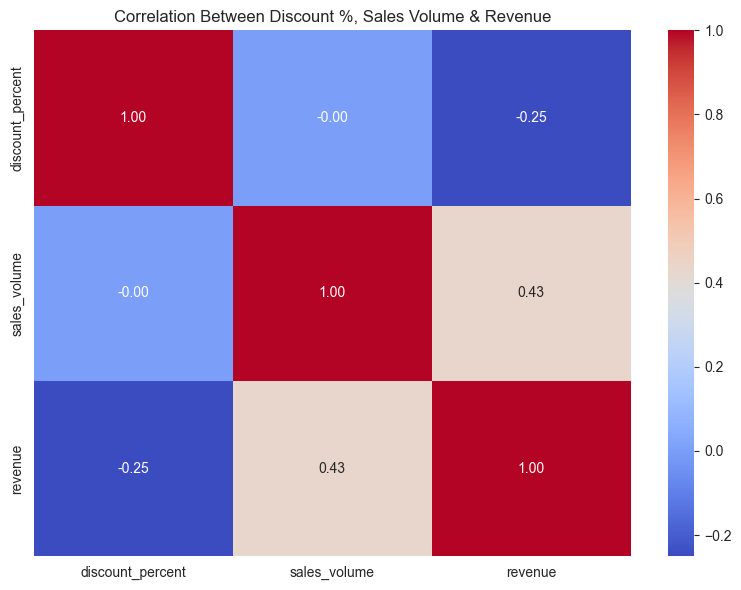

Category-wise Discount Impact Table:


subcategory  total_discount_given  total_sales_volume  \
0               Audio          2.399722e+08               63148   
1             Laptops          2.018109e+09              110245   
2         Smart Watch          6.743892e+08               93290   
3         Smartphones          1.179011e+10             1034488   
4  TV & Entertainment          3.823807e+08               20533   
5             Tablets          1.038713e+09               87878   

   total_revenue  discount_to_revenue_%  
0   1.111227e+09                  21.60  
1   9.404032e+09                  21.46  
2   3.215059e+09                  20.98  
3   5.615210e+10                  21.00  
4   1.923418e+09                  19.88  
5   5.082893e+09                  20.44

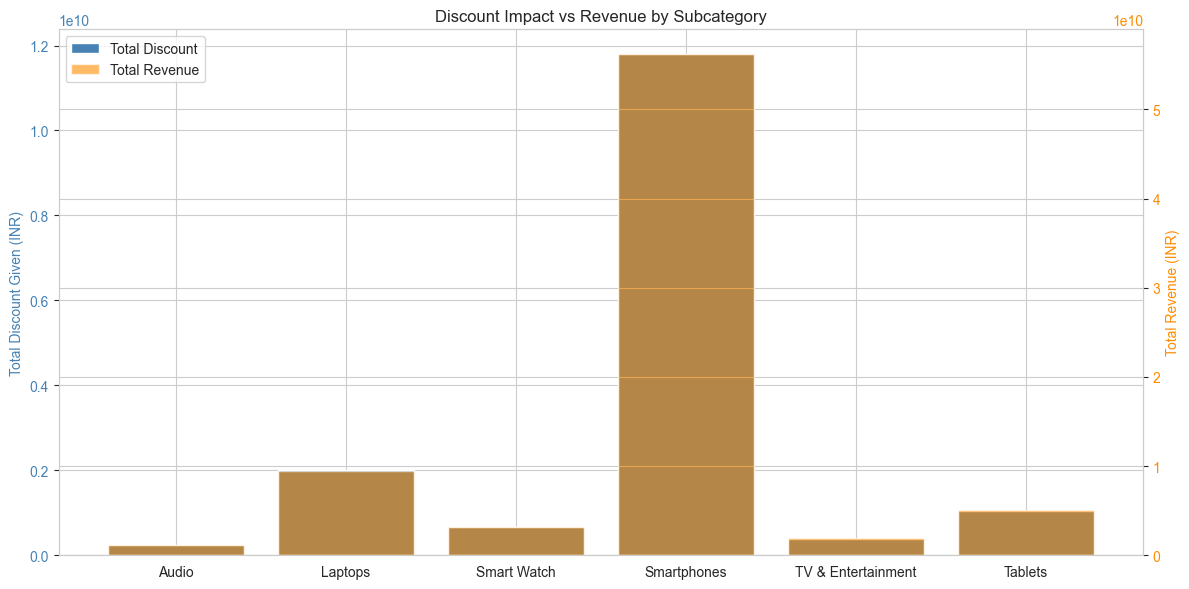

Yearly Discount Effectiveness Table:


order_year  avg_discount_percent  total_sales_volume  total_revenue
0         2015                 17.76               41354   2.142163e+09
1         2016                 17.57               69259   3.598316e+09
2         2017                 17.69               96872   5.510026e+09
3         2018                 17.66              124374   7.248545e+09
4         2019                 17.73              151655   8.605901e+09
5         2020                 17.17              179742   1.187319e+10
6         2021                 17.29              172787   1.099021e+10
7         2022                 17.29              165761   8.532312e+09
8         2023                 17.31              158858   7.712999e+09
9         2024                 17.36              152070   6.823413e+09
10        2025                 17.30               96850   3.851650e+09

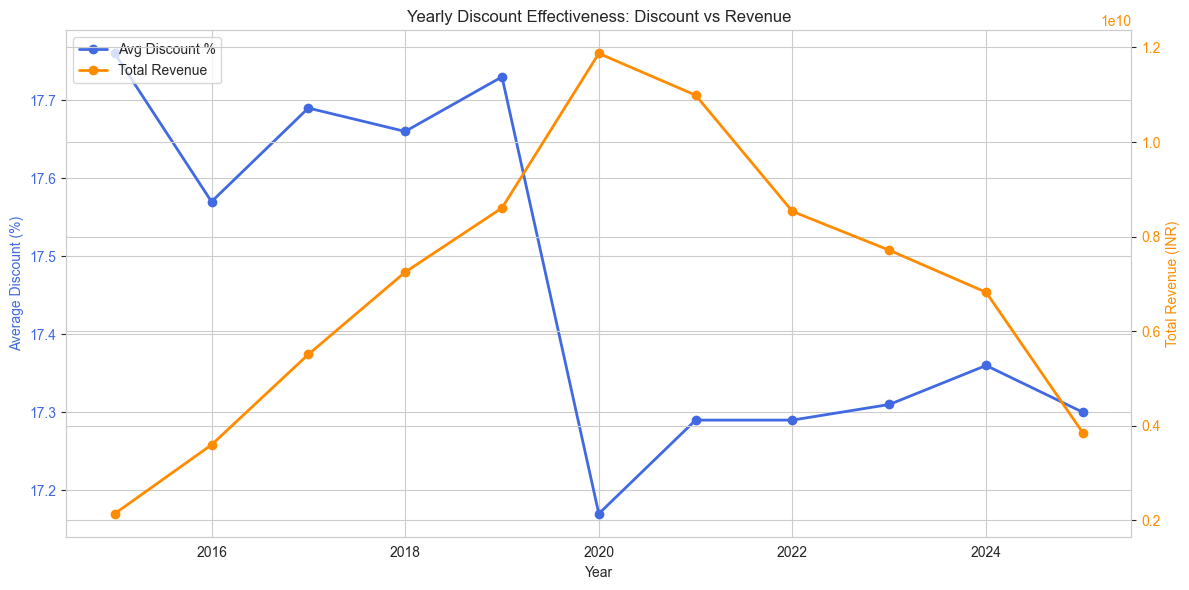

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. DATA PREPARATION
# -------------------------------
df=amazon_india_2015_2025.copy()

# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create time columns
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

# Calculate discount amount
df['discount_amount_inr'] = (
    df['original_price_inr'] * df['discount_percent'] / 100
)

# Ensure required columns
df['revenue'] = df['final_amount_inr']
df['sales_volume'] = df['quantity']

# -------------------------------
# 2. CORRELATION ANALYSIS (TABLE + HEATMAP)
# -------------------------------

correlation_table = df[
    ['discount_percent', 'sales_volume', 'revenue']
].corr().round(2)

print("Correlation Table:")
display(correlation_table)

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_table,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Between Discount %, Sales Volume & Revenue')
plt.tight_layout()
plt.show()

# -------------------------------
# 3. CATEGORY-WISE DISCOUNT IMPACT (TABLE)
# -------------------------------

category_discount_effect = (
    df.groupby('subcategory')
    .agg(
        total_discount_given=('discount_amount_inr', 'sum'),
        total_sales_volume=('sales_volume', 'sum'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

category_discount_effect['discount_to_revenue_%'] = (
    category_discount_effect['total_discount_given']
    / category_discount_effect['total_revenue'] * 100
).round(2)

print("Category-wise Discount Impact Table:")
display(category_discount_effect)

# -------------------------------
# 4. CATEGORY-WISE VISUALIZATION (DUAL AXIS)
# -------------------------------

fig, ax1 = plt.subplots(figsize=(12, 6))

# Discount (LEFT AXIS)
ax1.bar(
    category_discount_effect['subcategory'],
    category_discount_effect['total_discount_given'],
    color='steelblue',
    label='Total Discount'
)
ax1.set_ylabel('Total Discount Given (INR)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Revenue (RIGHT AXIS)
ax2 = ax1.twinx()
ax2.bar(
    category_discount_effect['subcategory'],
    category_discount_effect['total_revenue'],
    color='darkorange',
    alpha=0.6,
    label='Total Revenue'
)
ax2.set_ylabel('Total Revenue (INR)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('Discount Impact vs Revenue by Subcategory')
plt.xticks(rotation=45)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# -------------------------------
# 5. YEARLY DISCOUNT EFFECTIVENESS (TABLE + PROFESSIONAL DUAL AXIS)
# -------------------------------

yearly_discount_effect = (
    df.groupby('order_year')
    .agg(
        avg_discount_percent=('discount_percent', 'mean'),
        total_sales_volume=('sales_volume', 'sum'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

yearly_discount_effect['avg_discount_percent'] = (
    yearly_discount_effect['avg_discount_percent'].round(2)
)

print("Yearly Discount Effectiveness Table:")
display(yearly_discount_effect)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Avg Discount % (BLUE)
ax1.plot(
    yearly_discount_effect['order_year'],
    yearly_discount_effect['avg_discount_percent'],
    marker='o',
    linewidth=2,
    color='royalblue',
    label='Avg Discount %'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Discount (%)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Revenue (ORANGE)
ax2 = ax1.twinx()
ax2.plot(
    yearly_discount_effect['order_year'],
    yearly_discount_effect['total_revenue'],
    marker='o',
    linewidth=2,
    color='darkorange',
    label='Total Revenue'
)
ax2.set_ylabel('Total Revenue (INR)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('Yearly Discount Effectiveness: Discount vs Revenue')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


16 .Product rating patterns and their impact on sales

Correlation Table:


product_rating  sales_volume  revenue
product_rating            1.00          0.00     0.03
sales_volume              0.00          1.00     0.43
revenue                   0.03          0.43     1.00

Sales Impact by Rating:


C:\Users\Dell\AppData\Local\Temp\ipykernel_23404\3001226722.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_df.groupby('rating_bucket')


rating_bucket  total_sales_volume  total_revenue
0           Low                   0   0.000000e+00
1       Average                8343   4.456235e+08
2          Good              762994   4.140225e+10
3     Excellent              638245   3.504085e+10

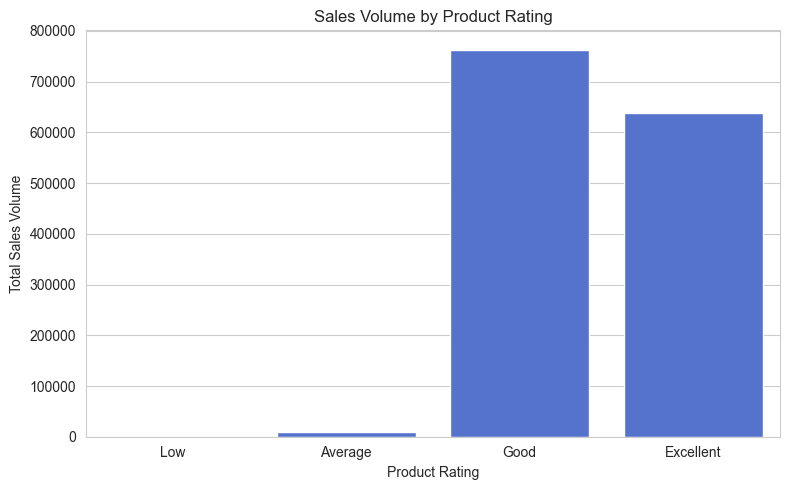

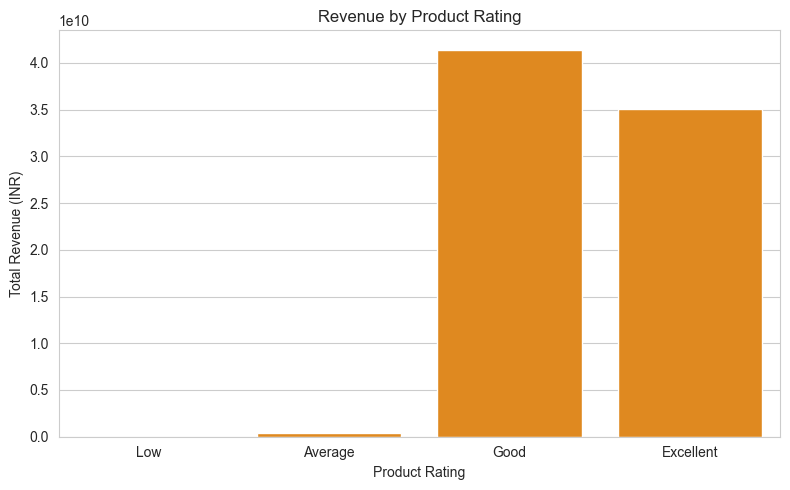

Average Rating by Subcategory:


subcategory  avg_rating  rating_count
4  TV & Entertainment        4.04         16477
5             Tablets        4.00         70254
2         Smart Watch        3.99         74708
3         Smartphones        3.98        827177
1             Laptops        3.92         88370
0               Audio        3.91         50623

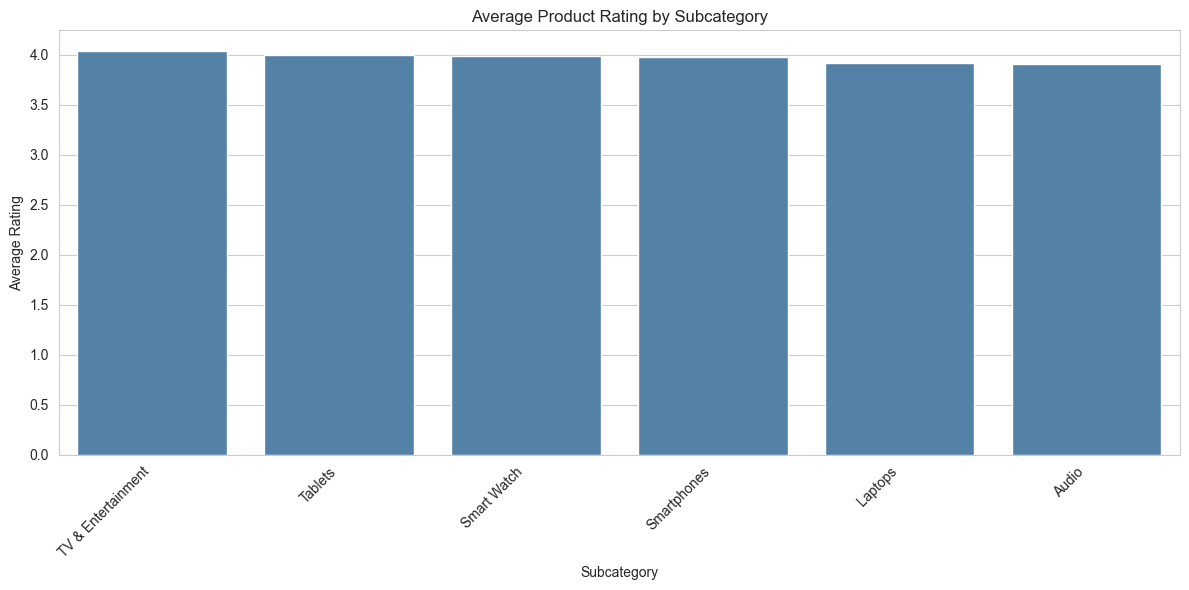

Rating by Price Range:


C:\Users\Dell\AppData\Local\Temp\ipykernel_23404\3001226722.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_df.groupby('price_range')


price_range  avg_rating  rating_count
0      Budget        3.95         13971
1         Mid        3.95        292288
2   Upper-Mid        3.97        383781
3     Premium        3.99        179836
4      Luxury        4.01        257733

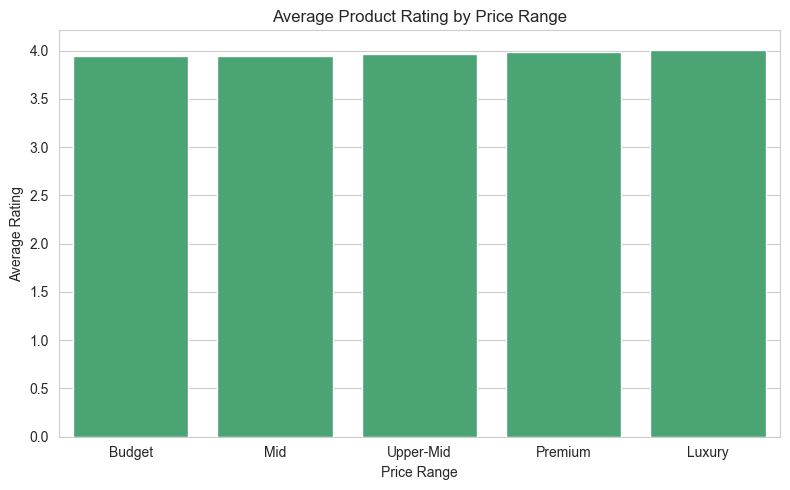

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=amazon_india_2015_2025.copy()

# Create required columns
df['sales_volume'] = df['quantity']
df['revenue'] = df['final_amount_inr']

# Remove missing ratings
rating_df = df.dropna(subset=['product_rating'])

# -----------------------------
# 1. CORRELATION ANALYSIS
# -----------------------------

rating_correlation = rating_df[
    ['product_rating', 'sales_volume', 'revenue']
].corr().round(2)

print("Correlation Table:")
display(rating_correlation)

plt.figure(figsize=(6, 4))
sns.heatmap(
    rating_correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Rating vs Sales & Revenue')
plt.tight_layout()
plt.show()

# -----------------------------
# 2. RATING PATTERN (BUCKETS)
# -----------------------------

rating_df['rating_bucket'] = pd.cut(
    rating_df['product_rating'],
    bins=[0, 2, 3, 4, 5],
    labels=['Low', 'Average', 'Good', 'Excellent']
)

rating_summary = (
    rating_df.groupby('rating_bucket')
    .agg(
        total_sales_volume=('sales_volume', 'sum'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

print("Sales Impact by Rating:")
display(rating_summary)

# -----------------------------
# 3. VISUALIZATION
# -----------------------------

plt.figure(figsize=(8, 5))
sns.barplot(
    x='rating_bucket',
    y='total_sales_volume',
    data=rating_summary,
    color='royalblue'
)
plt.title('Sales Volume by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Total Sales Volume')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='rating_bucket',
    y='total_revenue',
    data=rating_summary,
    color='darkorange'
)
plt.title('Revenue by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Total Revenue (INR)')
plt.tight_layout()
plt.show()

# -----------------------------
# 4. RATING DISTRIBUTION BY SUBCATEGORY
# -----------------------------

subcategory_rating = (
    rating_df.groupby('subcategory')
    .agg(
        avg_rating=('product_rating', 'mean'),
        rating_count=('product_rating', 'count')
    )
    .reset_index()
    .sort_values('avg_rating', ascending=False)
)

subcategory_rating['avg_rating'] = subcategory_rating['avg_rating'].round(2)

print("Average Rating by Subcategory:")
display(subcategory_rating)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='subcategory',
    y='avg_rating',
    data=subcategory_rating,
    color='steelblue'
)
plt.title('Average Product Rating by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. PRICE RANGE CREATION
# -----------------------------

rating_df['price_range'] = pd.cut(
    rating_df['original_price_inr'],
    bins=[0, 10000, 30000, 60000, 100000, rating_df['original_price_inr'].max()],
    labels=['Budget', 'Mid', 'Upper-Mid', 'Premium', 'Luxury']
)

# -----------------------------
# 6. RATING DISTRIBUTION BY PRICE RANGE
# -----------------------------

price_rating_summary = (
    rating_df.groupby('price_range')
    .agg(
        avg_rating=('product_rating', 'mean'),
        rating_count=('product_rating', 'count')
    )
    .reset_index()
)

price_rating_summary['avg_rating'] = price_rating_summary['avg_rating'].round(2)

print("Rating by Price Range:")
display(price_rating_summary)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='price_range',
    y='avg_rating',
    data=price_rating_summary,
    color='mediumseagreen'
)
plt.title('Average Product Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()



17

Purchase Frequency Summary:


customer_id  total_orders first_purchase last_purchase
0  CUST_2015_00000001             5     2015-09-03    2018-12-15
1  CUST_2015_00000002            10     2015-07-28    2022-11-02
2  CUST_2015_00000003             9     2015-01-05    2017-09-14
3  CUST_2015_00000004             8     2015-02-28    2021-07-06
4  CUST_2015_00000005             5     2015-01-21    2018-04-06

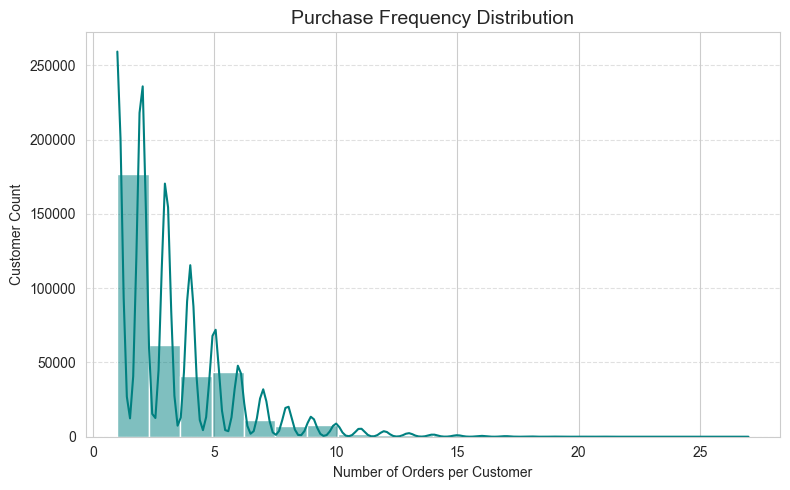


Customer Evolution Stages:


customer_stage  customer_count
0     First-Time           91365
1          Loyal           75676
2         Repeat          187928

C:\Users\Dell\AppData\Local\Temp\ipykernel_23404\4206065602.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


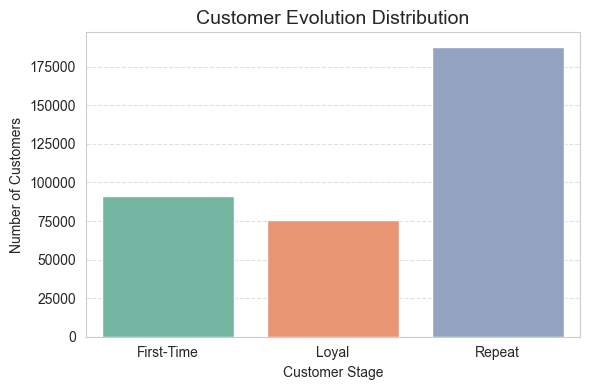


Category Transition Sample:


subcategory       next_category  transition_count
0       Audio               Audio              2742
1       Audio             Laptops              1726
2       Audio         Smart Watch              2590
3       Audio         Smartphones             24991
4       Audio  TV & Entertainment               326


Category Transition Matrix (Probabilities):


next_category       Audio  Laptops  Smart Watch  Smartphones  \
subcategory                                                    
Audio                0.08     0.05         0.08         0.73   
Laptops              0.03     0.11         0.06         0.72   
Smart Watch          0.05     0.07         0.08         0.73   
Smartphones          0.04     0.08         0.07         0.74   
TV & Entertainment   0.03     0.10         0.05         0.72   
Tablets              0.04     0.08         0.06         0.72   

next_category       TV & Entertainment  Tablets  
subcategory                                      
Audio                             0.01     0.05  
Laptops                           0.02     0.07  
Smart Watch                       0.01     0.06  
Smartphones                       0.01     0.06  
TV & Entertainment                0.03     0.07  
Tablets                           0.02     0.08

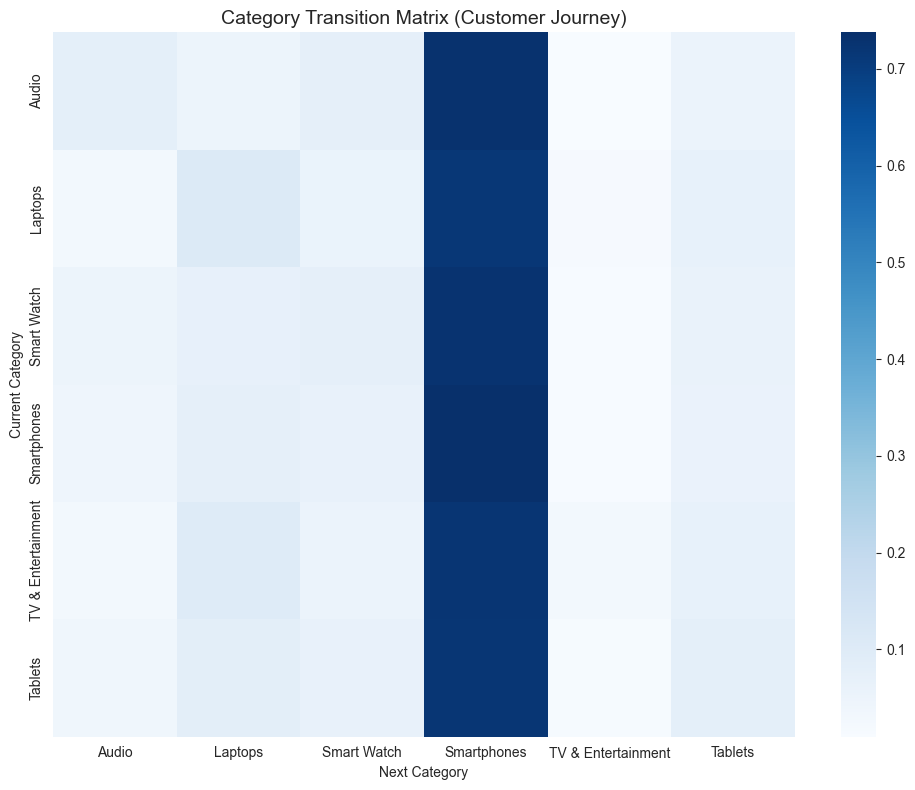


Category Preferences by Customer Stage (Sample):


customer_stage         subcategory  order_count
0     First-Time               Audio         4214
1     First-Time             Laptops         6683
2     First-Time         Smart Watch         5940
3     First-Time         Smartphones        68133
4     First-Time  TV & Entertainment         1279

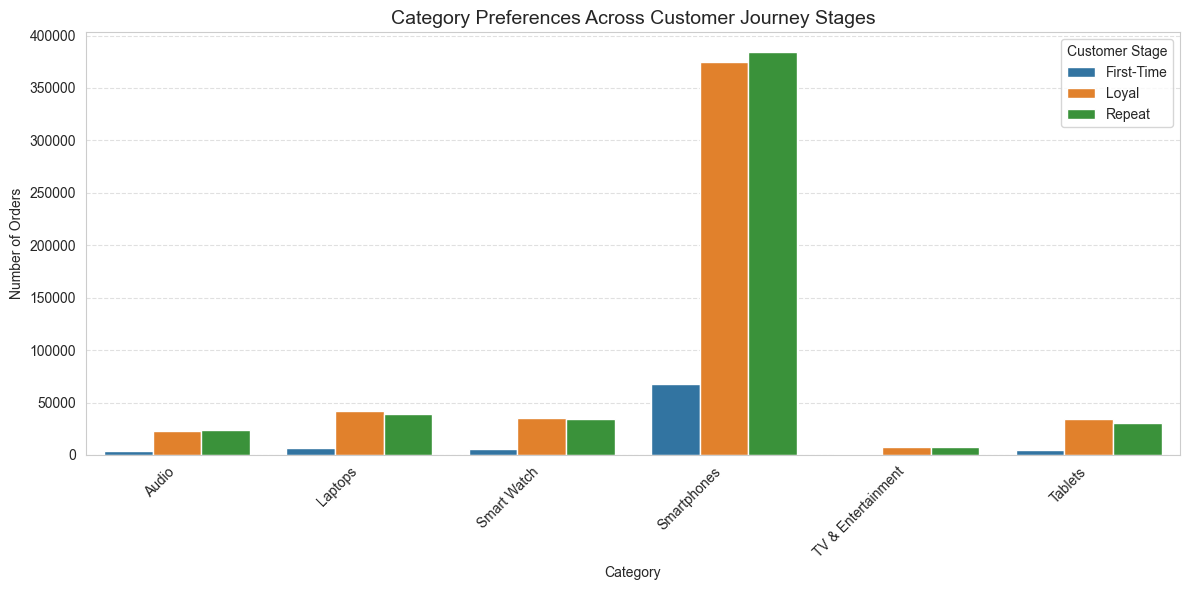

In [7]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# DATAFRAME
# =========================
df = amazon_india_2015_2025.copy()

# Required columns:
# customer_id, order_date_clean, category, transaction_id

# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# =========================
# STEP 1: PURCHASE FREQUENCY PATTERNS
# =========================
purchase_freq = (
    df.groupby('customer_id')
    .agg(
        total_orders=('transaction_id', 'count'),
        first_purchase=('order_date', 'min'),
        last_purchase=('order_date', 'max')
    )
    .reset_index()
)

print("Purchase Frequency Summary:")
display(purchase_freq.head())

plt.figure(figsize=(8, 5))
sns.histplot(
    purchase_freq['total_orders'],
    bins=20,
    kde=True,
    color='teal'
)
plt.title('Purchase Frequency Distribution', fontsize=14)
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Customer Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 2: CUSTOMER EVOLUTION STAGES
# =========================
def customer_stage(x):
    if x == 1:
        return 'First-Time'
    elif 2 <= x <= 4:
        return 'Repeat'
    else:
        return 'Loyal'

purchase_freq['customer_stage'] = purchase_freq['total_orders'].apply(customer_stage)

stage_distribution = (
    purchase_freq.groupby('customer_stage')
    .size()
    .reset_index(name='customer_count')
)

print("\nCustomer Evolution Stages:")
display(stage_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='customer_stage',
    y='customer_count',
    data=stage_distribution,
    palette='Set2'
)
plt.title('Customer Evolution Distribution', fontsize=14)
plt.xlabel('Customer Stage')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 3: CATEGORY TRANSITION DATA
# =========================
df_sorted = df.sort_values(['customer_id', 'order_date'])

df_sorted['next_category'] = (
    df_sorted.groupby('customer_id')['subcategory']
    .shift(-1)
)

transitions = df_sorted.dropna(subset=['next_category'])

transition_counts = (
    transitions.groupby(['subcategory', 'next_category'])
    .size()
    .reset_index(name='transition_count')
)

print("\nCategory Transition Sample:")
display(transition_counts.head())

# =========================
# STEP 4: TRANSITION MATRIX
# =========================
transition_matrix = transition_counts.pivot(
    index='subcategory',
    columns='next_category',
    values='transition_count'
).fillna(0)

# Normalize to probabilities
transition_matrix_prob = transition_matrix.div(
    transition_matrix.sum(axis=1), axis=0
)

print("\nCategory Transition Matrix (Probabilities):")
display(transition_matrix_prob.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(
    transition_matrix_prob,
    cmap='Blues',
    annot=False
)
plt.title('Category Transition Matrix (Customer Journey)', fontsize=14)
plt.xlabel('Next Category')
plt.ylabel('Current Category')
plt.tight_layout()
plt.show()

# =========================
# STEP 5: CATEGORY PREFERENCES BY CUSTOMER STAGE
# =========================
df_stage = df.merge(
    purchase_freq[['customer_id', 'customer_stage']],
    on='customer_id',
    how='left'
)

stage_category = (
    df_stage.groupby(['customer_stage', 'subcategory'])
    .size()
    .reset_index(name='order_count')
)

print("\nCategory Preferences by Customer Stage (Sample):")
display(stage_category.head())

plt.figure(figsize=(12, 6))
sns.barplot(
    x='subcategory',
    y='order_count',
    hue='customer_stage',
    data=stage_category,
    palette='tab10'
)
plt.title('Category Preferences Across Customer Journey Stages', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Stage')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

18

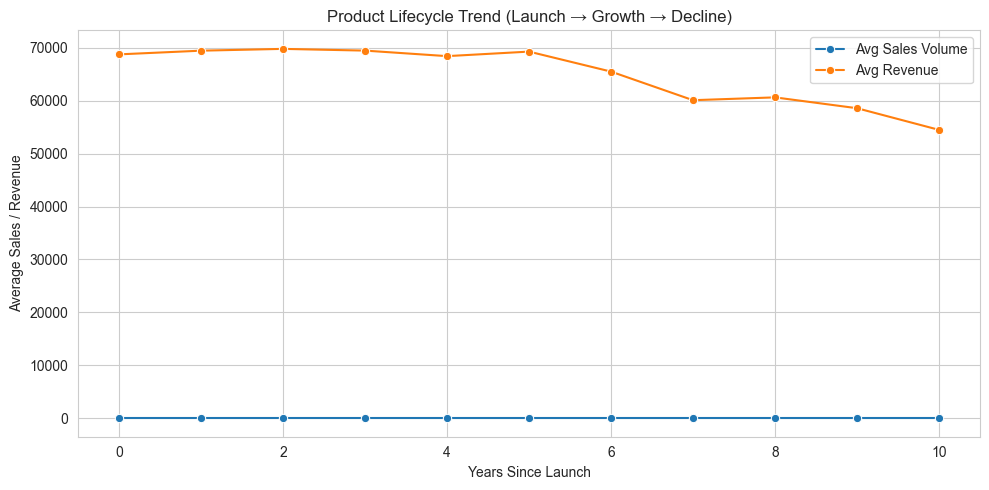

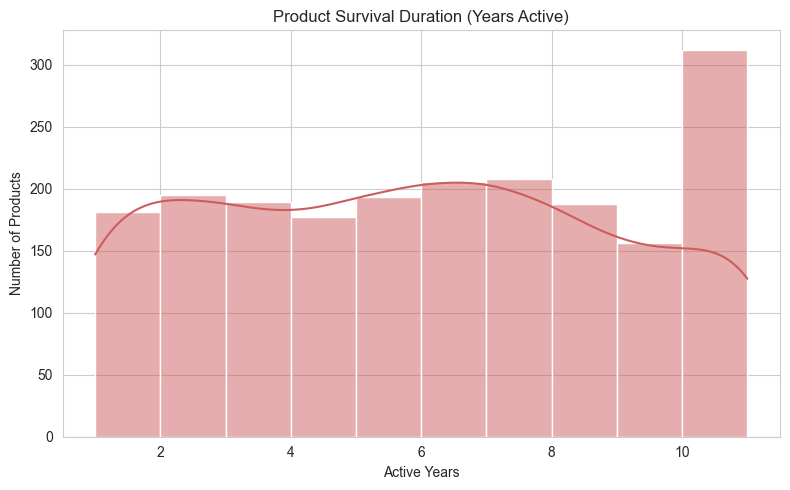

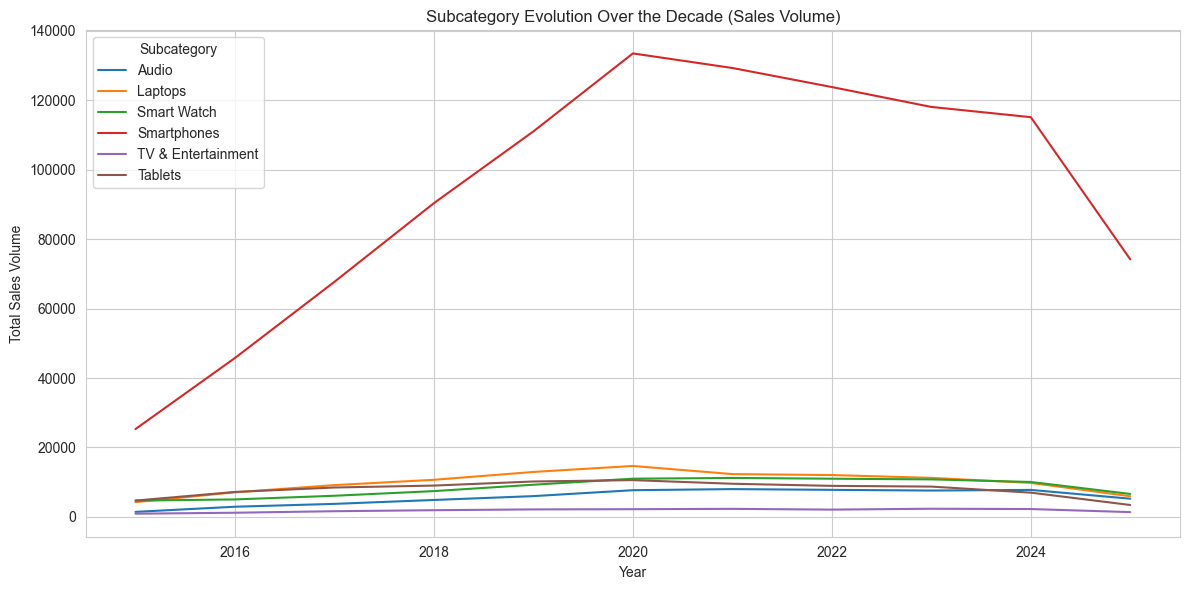

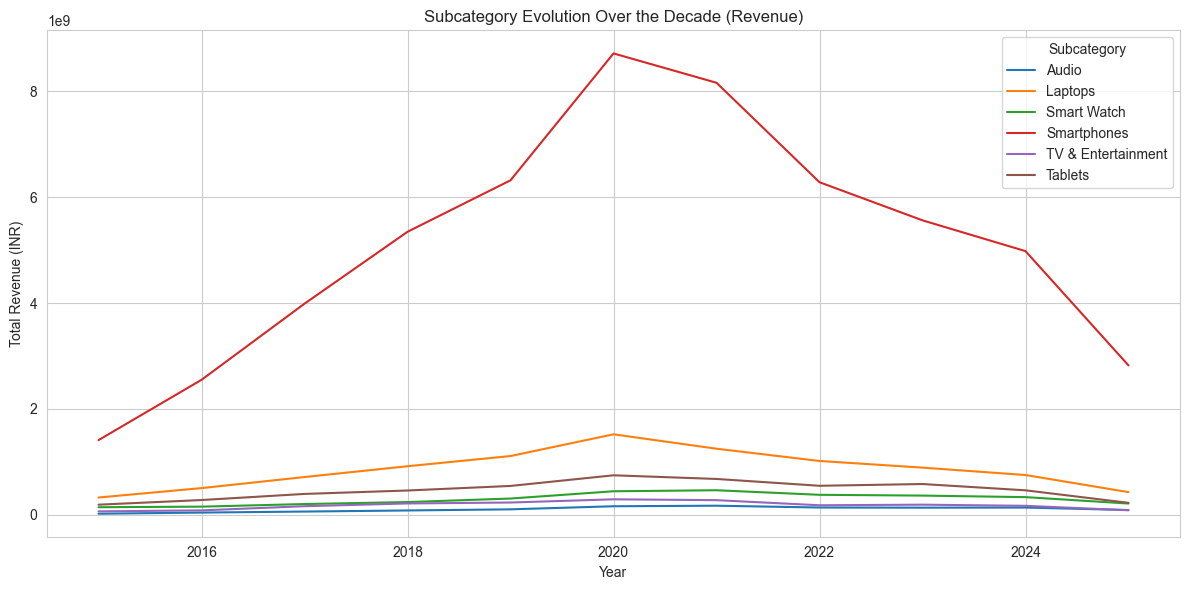

In [10]:
# =====================================
# INVENTORY & PRODUCT LIFECYCLE ANALYSIS
# (SUBCATEGORY LEVEL)
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------
# LOAD DATA
# -------------------------------------
df = amazon_india_2015_2025.copy()

# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Required metrics
df['sales_volume'] = df['quantity']
df['revenue'] = df['final_amount_inr']

# -------------------------------------
# STEP 1: IDENTIFY PRODUCT LAUNCH YEAR
# -------------------------------------
product_launch = (
    df.groupby('product_id')
    .agg(
        launch_year=('order_year', 'min'),
    )
    .reset_index()
)

df = df.merge(product_launch, on='product_id', how='left')

# -------------------------------------
# STEP 2: YEARS SINCE LAUNCH (LIFECYCLE)
# -------------------------------------
df['years_since_launch'] = df['order_year'] - df['launch_year']

# -------------------------------------
# STEP 3: PRODUCT LIFECYCLE TREND
# -------------------------------------
lifecycle_trend = (
    df.groupby('years_since_launch')
    .agg(
        avg_sales_volume=('sales_volume', 'mean'),
        avg_revenue=('revenue', 'mean')
    )
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    x='years_since_launch',
    y='avg_sales_volume',
    data=lifecycle_trend,
    marker='o',
    label='Avg Sales Volume'
)
sns.lineplot(
    x='years_since_launch',
    y='avg_revenue',
    data=lifecycle_trend,
    marker='o',
    label='Avg Revenue'
)
plt.title('Product Lifecycle Trend (Launch → Growth → Decline)')
plt.xlabel('Years Since Launch')
plt.ylabel('Average Sales / Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------
# STEP 4: PRODUCT SURVIVAL / DECLINE
# -------------------------------------
product_survival = (
    df.groupby('product_id')['order_year']
    .nunique()
    .reset_index(name='active_years')
)

plt.figure(figsize=(8, 5))
sns.histplot(
    product_survival['active_years'],
    bins=10,
    kde=True,
    color='indianred'
)
plt.title('Product Survival Duration (Years Active)')
plt.xlabel('Active Years')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# -------------------------------------
# STEP 5: SUBCATEGORY EVOLUTION OVER TIME
# -------------------------------------
subcategory_trend = (
    df.groupby(['order_year','subcategory'])
    .agg(
        total_sales_volume=('sales_volume', 'sum'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='order_year',
    y='total_sales_volume',
    hue='subcategory',
    data=subcategory_trend
)
plt.title('Subcategory Evolution Over the Decade (Sales Volume)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.legend(title='Subcategory')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='order_year',
    y='total_revenue',
    hue='subcategory',
    data=subcategory_trend
)
plt.title('Subcategory Evolution Over the Decade (Revenue)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (INR)')
plt.legend(title='Subcategory')
plt.tight_layout()
plt.show()



19

In [17]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# DATA
# =========================
df = amazon_india_2015_2025.copy()

# Keep only required columns and clean
df = df[['brand', 'subcategory', 'original_price_inr', 'transaction_id']].dropna()

# =========================
# 1. PRICE POSITIONING HEATMAP
# =========================
price_matrix = df.pivot_table(
    index='brand',
    columns='subcategory',
    values='original_price_inr',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    price_matrix,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Price Positioning Matrix (Average Price by Brand & Subcategory)')
plt.xlabel('Subcategory')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# =========================
# 2. MARKET PENETRATION HEATMAP
# =========================
market_penetration = (
    df.groupby(['subcategory', 'brand'])
    .agg(order_count=('transaction_id', 'count'))
    .reset_index()
)

market_penetration['market_share_pct'] = (
    market_penetration['order_count'] /
    market_penetration.groupby('subcategory')['order_count'].transform('sum')
) * 100

market_matrix = market_penetration.pivot_table(
    index='brand',
    columns='subcategory',
    values='market_share_pct',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    market_matrix,
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Market Penetration Matrix (% Share by Brand & Subcategory)')
plt.xlabel('Subcategory')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# =========================
# 3. BOX PLOT WITH AVERAGE BRAND PRICE
# =========================
plt.figure(figsize=(14, 6))

# Box plot (price distribution)
sns.boxplot(
    x='brand',
    y='original_price_inr',
    data=df,
    showfliers=False
)

# Overlay average price per brand
sns.pointplot(
    x='brand',
    y='original_price_inr',
    data=df,
    estimator='mean',
    color='red',
    markers='D',
    scale=0.7,
    errorbar=None
)

plt.title('Brand Price Distribution with Average Price Overlay')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23404\3204684577.py:85: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


20

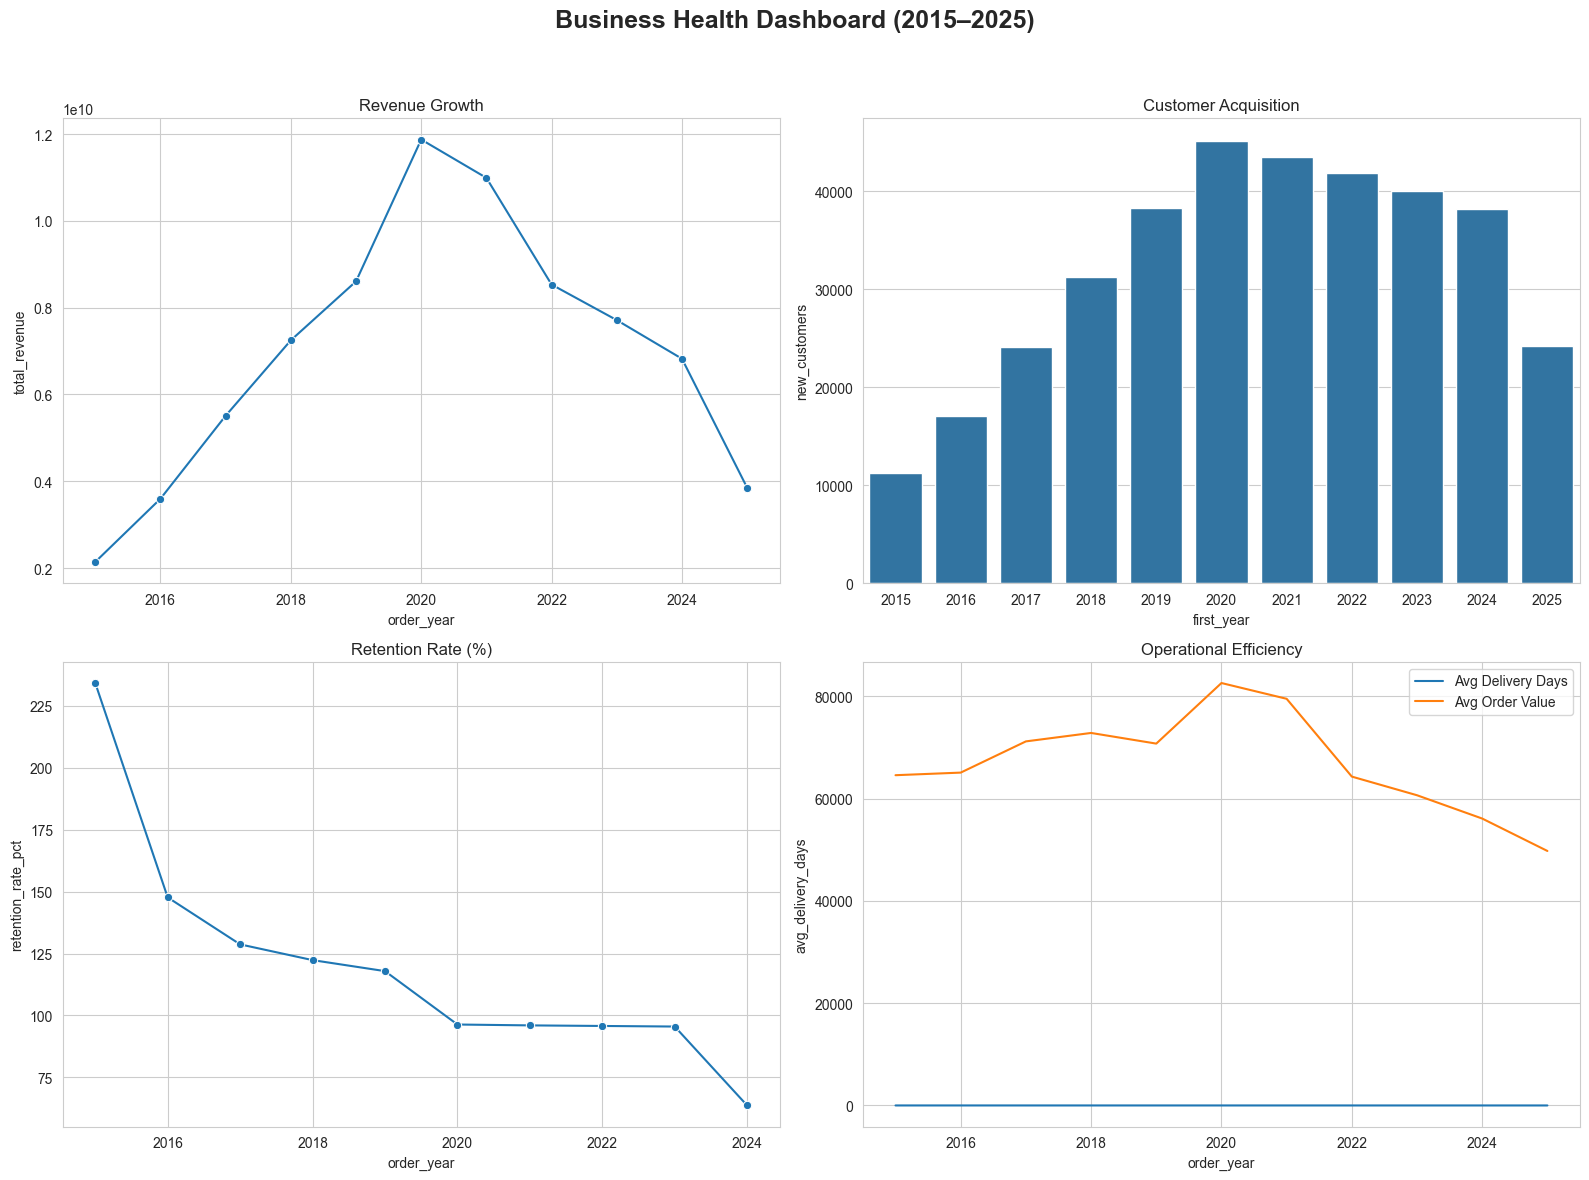

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------------------------------
# DATA PREPARATION
# --------------------------------------------
df = amazon_india_2015_2025.copy()

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')

# --------------------------------------------
# CLEAN DELIVERY DAYS (CRITICAL FIX)
# --------------------------------------------
def parse_delivery_days(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower()
    if 'same' in x:
        return 0
    if '-' in x:
        nums = [int(n) for n in x.split('-') if n.isdigit()]
        return np.mean(nums) if nums else np.nan
    if x.isdigit():
        return int(x)
    return np.nan

df['delivery_days_clean'] = df['delivery_days'].apply(parse_delivery_days)

# --------------------------------------------
# 1. REVENUE GROWTH
# --------------------------------------------
yearly_revenue = (
    df.groupby('order_year', as_index=False)
    .agg(total_revenue=('revenue', 'sum'))
)

yearly_revenue['revenue_growth_pct'] = (
    yearly_revenue['total_revenue'].pct_change() * 100
)

# --------------------------------------------
# 2. CUSTOMER ACQUISITION
# --------------------------------------------
first_purchase = (
    df.groupby('customer_id')['order_year']
    .min()
    .reset_index(name='first_year')
)

customer_acquisition = (
    first_purchase.groupby('first_year', as_index=False)
    .agg(new_customers=('customer_id', 'count'))
)

# --------------------------------------------
# 3. CUSTOMER RETENTION
# --------------------------------------------
customer_years = (
    df.groupby(['customer_id', 'order_year'], as_index=False)
    .size()
)

retention = (
    customer_years.groupby('order_year', as_index=False)
    .agg(active_customers=('customer_id', 'nunique'))
)

retention['retention_rate_pct'] = (
    retention['active_customers'].shift(-1) /
    retention['active_customers']
) * 100

# --------------------------------------------
# 4. OPERATIONAL EFFICIENCY (FIXED)
# --------------------------------------------
ops_metrics = (
    df.groupby('order_year', as_index=False)
    .agg(
        avg_delivery_days=('delivery_days_clean', 'mean'),
        avg_order_value=('revenue', 'mean')
    )
)

# --------------------------------------------
# DASHBOARD
# --------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Business Health Dashboard (2015–2025)', fontsize=18, fontweight='bold')

sns.lineplot(ax=axes[0, 0], data=yearly_revenue,
             x='order_year', y='total_revenue', marker='o')
axes[0, 0].set_title('Revenue Growth')

sns.barplot(ax=axes[0, 1], data=customer_acquisition,
            x='first_year', y='new_customers')
axes[0, 1].set_title('Customer Acquisition')

sns.lineplot(ax=axes[1, 0], data=retention,
             x='order_year', y='retention_rate_pct', marker='o')
axes[1, 0].set_title('Retention Rate (%)')

sns.lineplot(ax=axes[1, 1], data=ops_metrics,
             x='order_year', y='avg_delivery_days', label='Avg Delivery Days')
sns.lineplot(ax=axes[1, 1], data=ops_metrics,
             x='order_year', y='avg_order_value', label='Avg Order Value')
axes[1, 1].legend()
axes[1, 1].set_title('Operational Efficiency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


21